In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 5)

# Time series plot and decomposition

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [3]:
df = pd.read_csv('/content/Decomposition.csv')
df.head()

date  data
0  1960-01-01  0.71
1  1960-04-01  0.63
2  1960-07-02  0.85
3  1960-10-01  0.44
4  1961-01-01  0.61

In [4]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

date   data  year
0   1960-01-01   0.71  1960
1   1960-04-01   0.63  1960
2   1960-07-02   0.85  1960
3   1960-10-01   0.44  1960
4   1961-01-01   0.61  1961
..         ...    ...   ...
79  1979-10-01   9.99  1979
80  1980-01-01  16.20  1980
81  1980-04-01  14.67  1980
82  1980-07-02  16.02  1980
83  1980-10-01  11.61  1980

[84 rows x 3 columns]

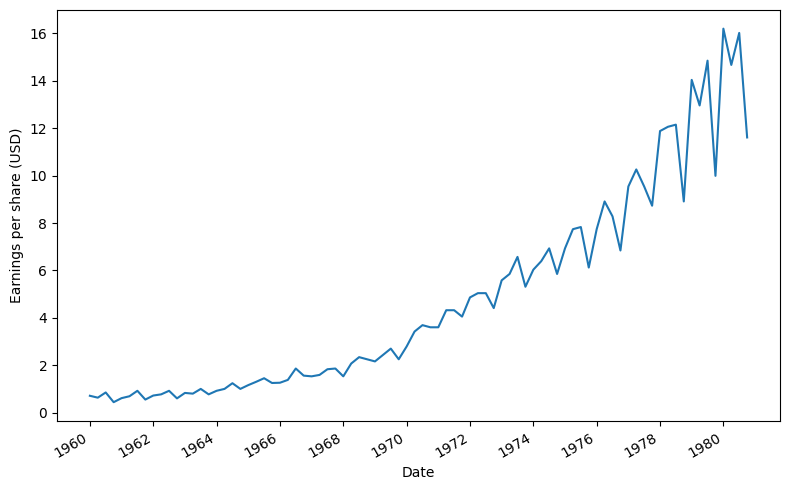

In [5]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [6]:
advanced_decomposition = STL(df.data, period=4).fit()

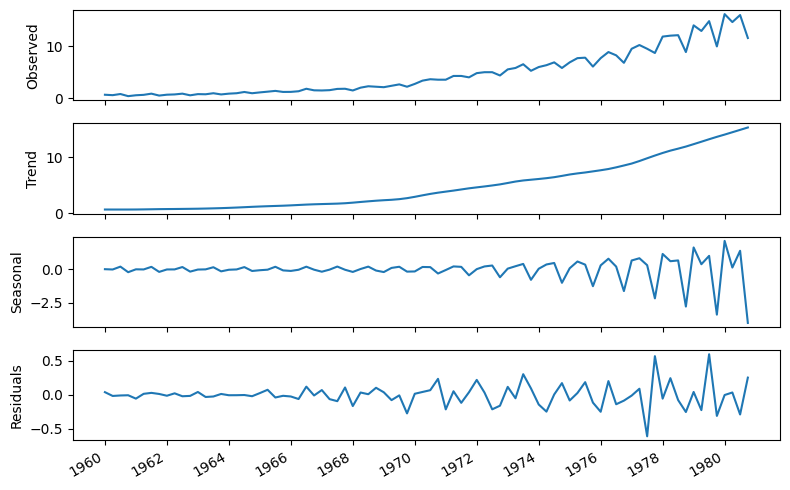

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

# Transformations in Time Series

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

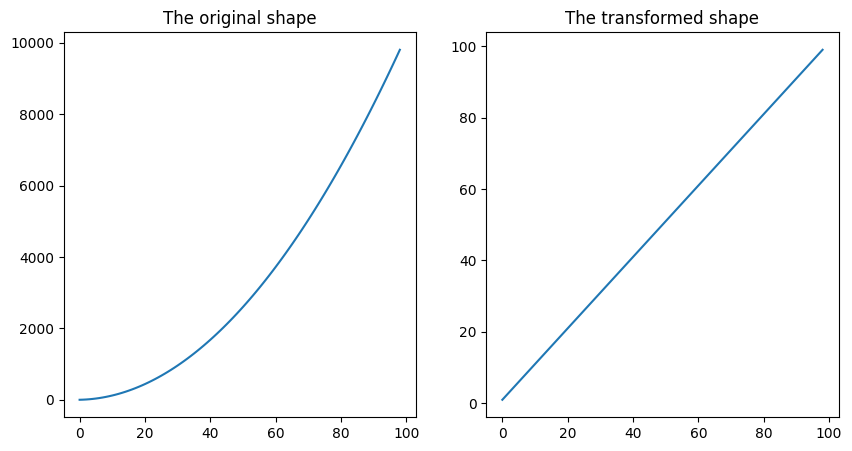

In [10]:
# Power Transformation
fig, axes = plt.subplots(1, 2,
                        figsize=(10, 5))

X = np.arange(1, 100) ** 2
axes[0].plot(X)
axes[0].set_title("The original shape");

X = X ** (1/2)
axes[1].plot(X)
axes[1].set_title("The transformed shape");

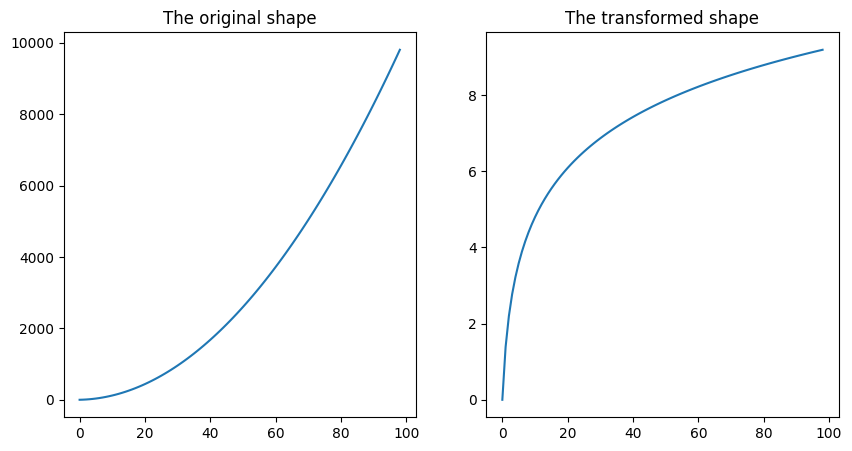

In [11]:
# Log Transformation
fig, axes = plt.subplots(1, 2,
                        figsize=(10, 5))

X = np.arange(1, 100) ** 2
axes[0].plot(X)
axes[0].set_title("The original shape");

X = np.log(X)
axes[1].plot(X)
axes[1].set_title("The transformed shape");

In [12]:
## Box-cox transformation
from scipy.stats import boxcox

In [13]:
df = pd.read_csv("/content/airline_passengers.csv")
df.head()

Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

In [14]:
df.Month = pd.to_datetime(df["Month"], format="%Y-%m")
df = df.set_index(df["Month"])

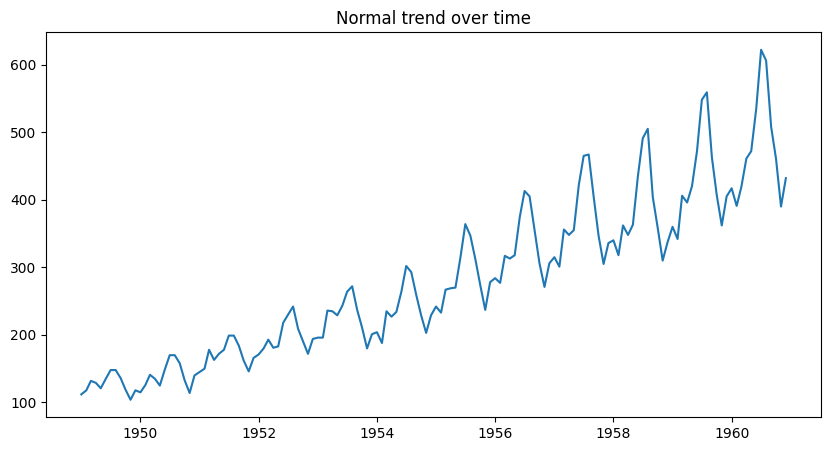

In [15]:
plt.rcParams["figure.figsize"] = 10, 5
plt.plot(df["Passengers"])
plt.title("Normal trend over time");

In [16]:
df["log"] = np.log(df.Passengers)
df["sqrt"] = np.sqrt(df.Passengers)
boxed, lambda_ = boxcox(df.Passengers)
df["boxcox"] = boxed

In [17]:
lambda_

0.14802265137037945

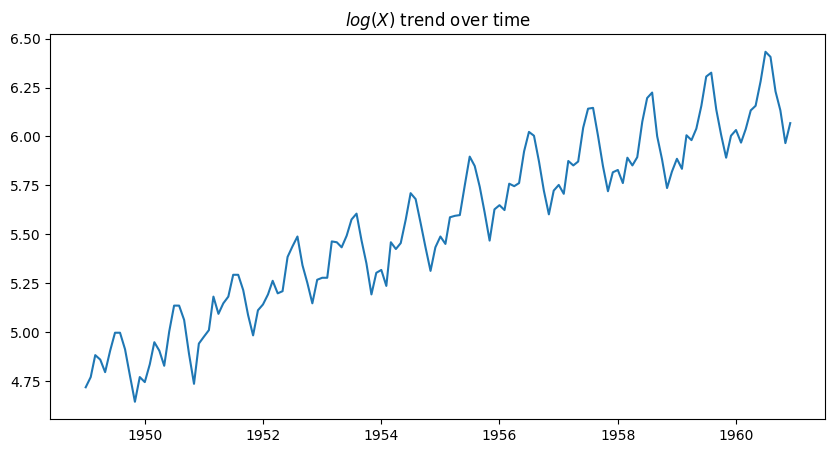

In [18]:
# Log
plt.plot(df["log"])
plt.title("$log(X)$ trend over time");

It is more even on the both sides? like, the magnitude is not changing much as it did in the normal data.

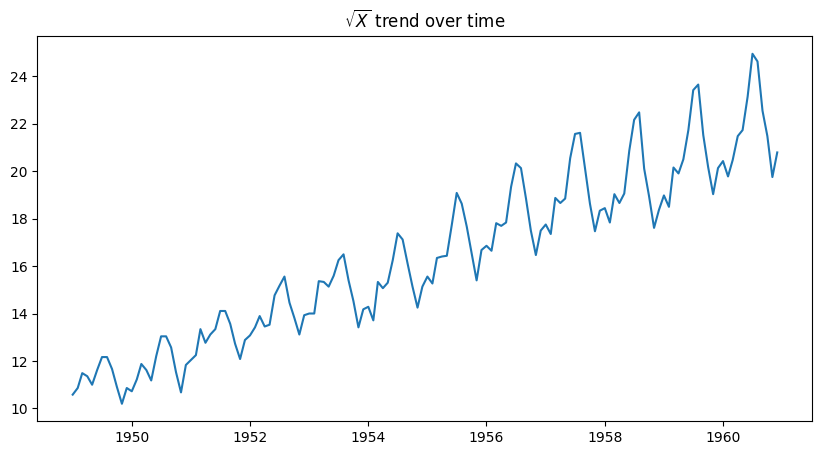

In [19]:
# Sqrt
plt.plot(df["sqrt"])
plt.title("$\sqrt{X}$ trend over time");

It still has some increase in the magnitude but not much as the original data.

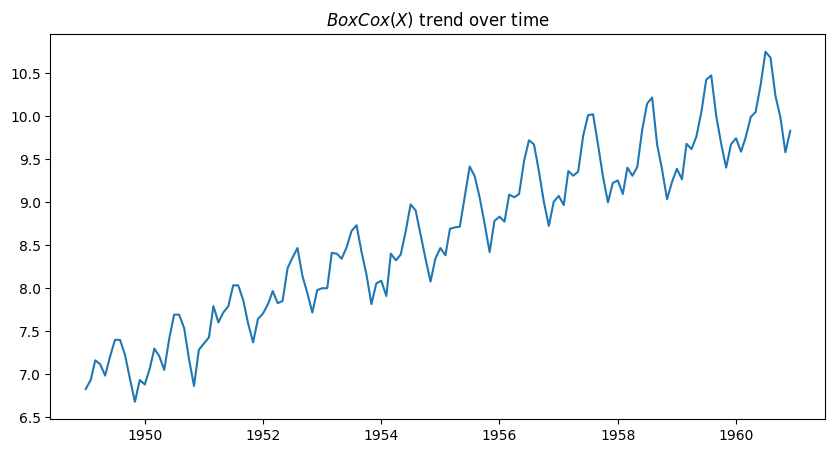

In [20]:
# Box-cox
plt.plot(df["boxcox"])
plt.title("$BoxCox(X)$ trend over time");

It is similart to the log. So, here log and boxcox work similar (kind of)

# Naive Forecasting Methods

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv('/content/Decomposition.csv')
df.head()

date  data
0  1960-01-01  0.71
1  1960-04-01  0.63
2  1960-07-02  0.85
3  1960-10-01  0.44
4  1961-01-01  0.61

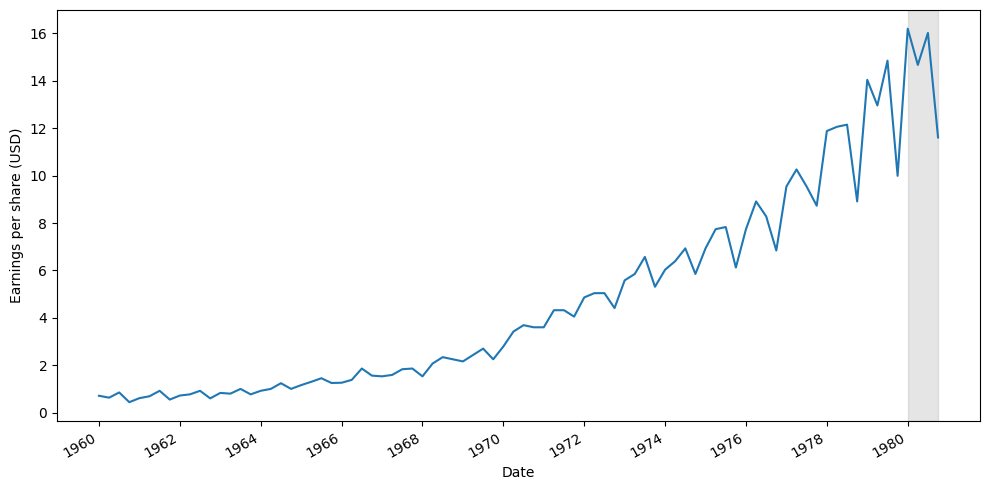

In [23]:
# Plot data with train/test split
fig, ax = plt.subplots()

ax.plot(df['date'], df['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [24]:
train = df[:-4]
test = df[-4:]

## Average Method

In [25]:
historical_mean = np.mean(train['data'])
historical_mean

4.308499987499999

In [26]:
test.loc[:, 'pred_mean'] = historical_mean

<ipython-input-26-3e17fece92b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = historical_mean


In [27]:
# Check test error
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

70.00752579965119

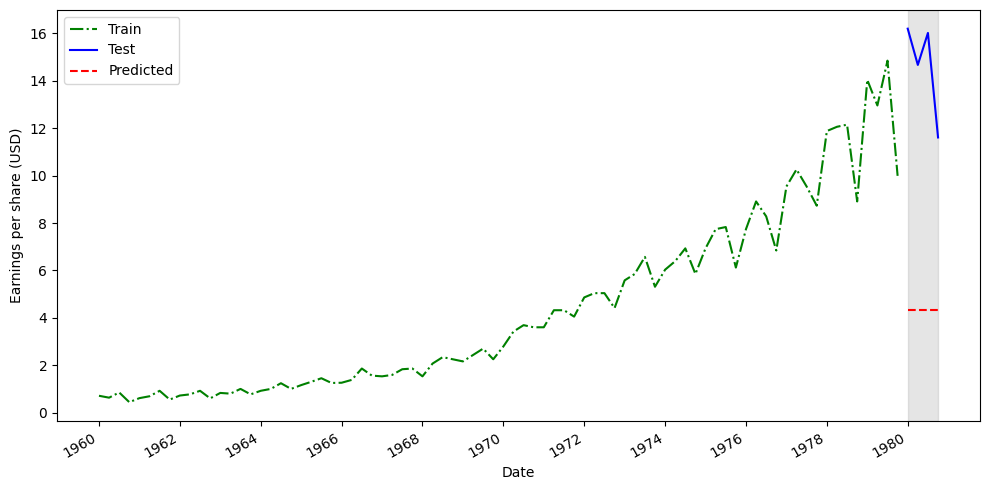

In [29]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## Naive Method

In [31]:
last = train['data'].iloc[-1]
last

9.99

In [32]:
test.loc[:, 'pred_last'] = last

test

<ipython-input-32-3a426c9dce84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last


date   data  pred_mean  pred_last
80  1980-01-01  16.20     4.3085       9.99
81  1980-04-01  14.67     4.3085       9.99
82  1980-07-02  16.02     4.3085       9.99
83  1980-10-01  11.61     4.3085       9.99

In [33]:
mape_last = mape(test['data'], test['pred_last'])
mape_last

30.457277908606535

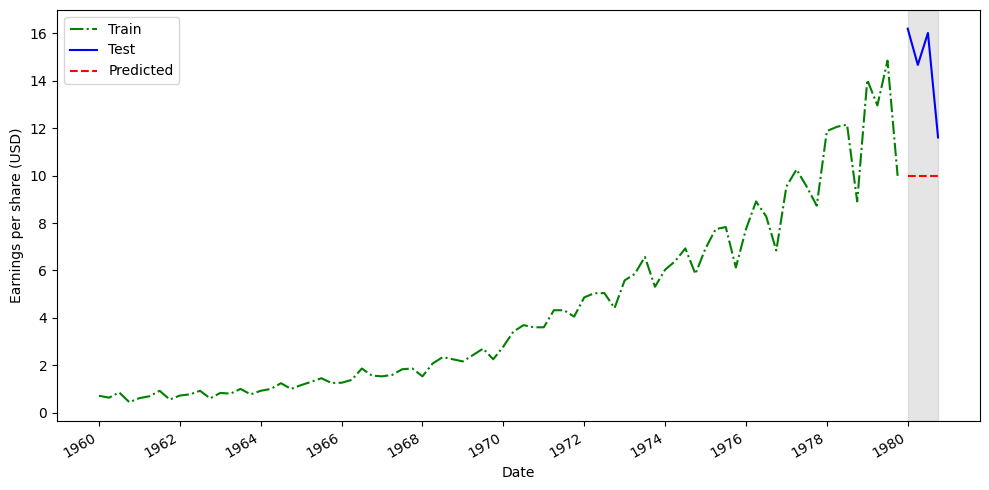

In [34]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## Naive seasonal forecast

In [35]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values
test

<ipython-input-35-8dd61e765953>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_season'] = train['data'][-4:].values


date   data  pred_mean  pred_last  pred_last_season
80  1980-01-01  16.20     4.3085       9.99             14.04
81  1980-04-01  14.67     4.3085       9.99             12.96
82  1980-07-02  16.02     4.3085       9.99             14.85
83  1980-10-01  11.61     4.3085       9.99              9.99

In [36]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

11.561658552433654

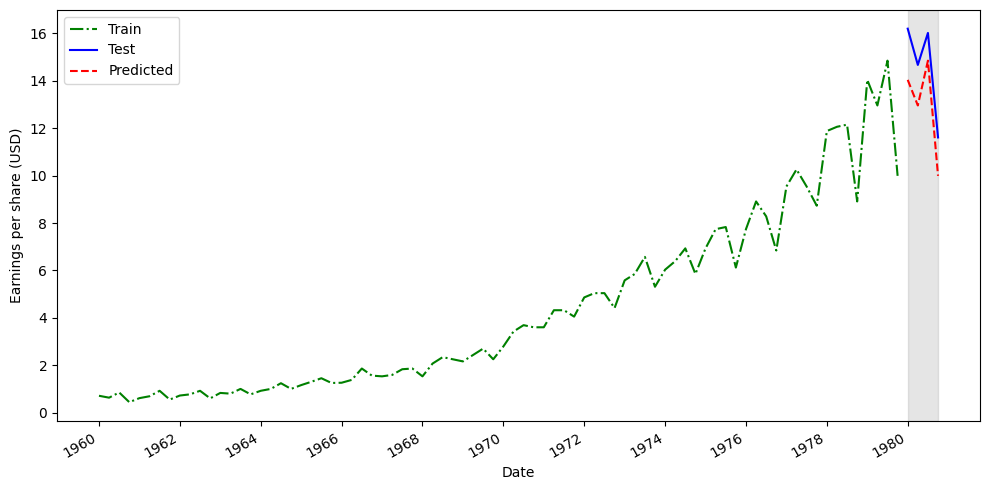

In [37]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

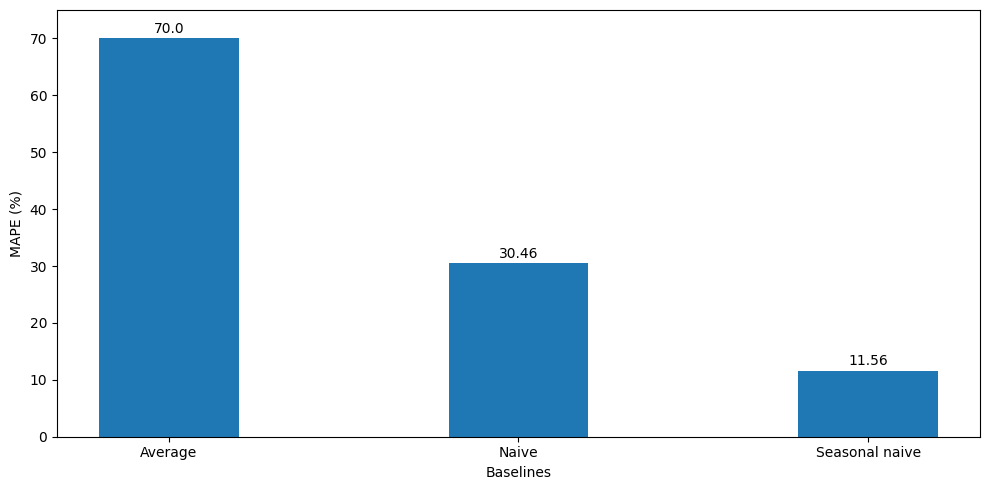

In [38]:
fig, ax = plt.subplots()

x = ['Average', 'Naive', 'Seasonal naive']
y = [70.00, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

## Exercise

Forecast the close price of SPY data using the naive methods and compute the corresponding MAPE values. Also check RMSE and MAE values.

# Stationarity of Time Series

In [39]:
#from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

## Simulating a random walk process

In [40]:
np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0]=0

random_walk = np.cumsum(steps)

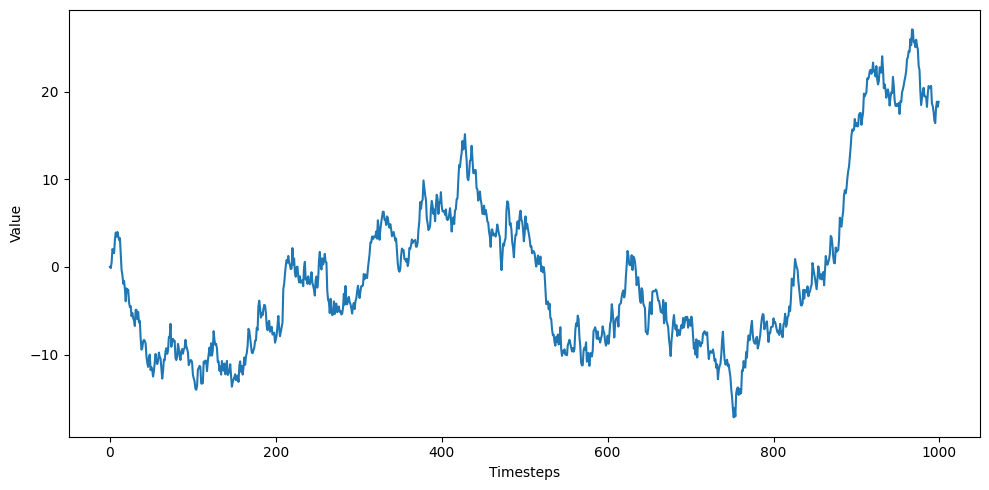

In [41]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

### Testing for stationarity

In [42]:
def simulate_process(is_stationary: bool) -> np.array:
    np.random.seed(42)
    process = np.empty(400)

    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10

    for i in range(400):
        if i+1 < 400:
            process[i+1] = alpha*process[i] + np.random.standard_normal()
        else:
            break

    return process

In [43]:
stationary = simulate_process(True)
non_stationary = simulate_process(False)

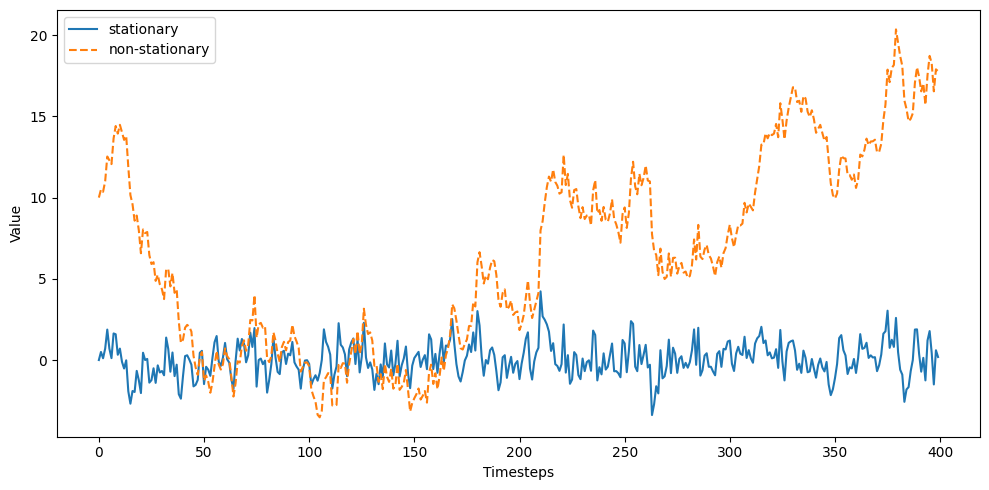

In [44]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle='-', label='stationary')
ax.plot(non_stationary, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()

In [45]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []

    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))

    return mean_func

In [46]:
stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


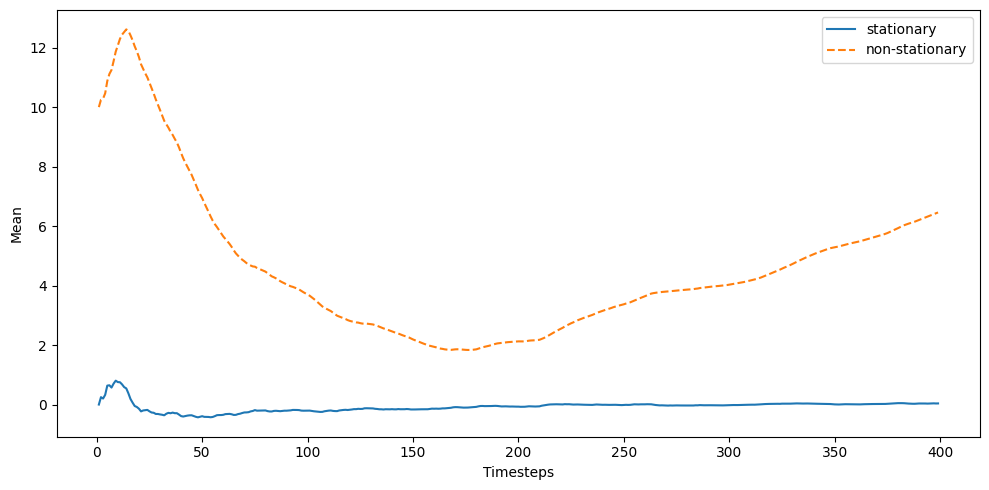

In [47]:
fig, ax = plt.subplots()

ax.plot(stationary_mean, label='stationary')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()

In [48]:
def var_over_time(process: np.array) -> np.array:
    var_func = []

    for i in range(len(process)):
        var_func.append(np.var(process[:i]))

    return var_func

In [49]:
stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


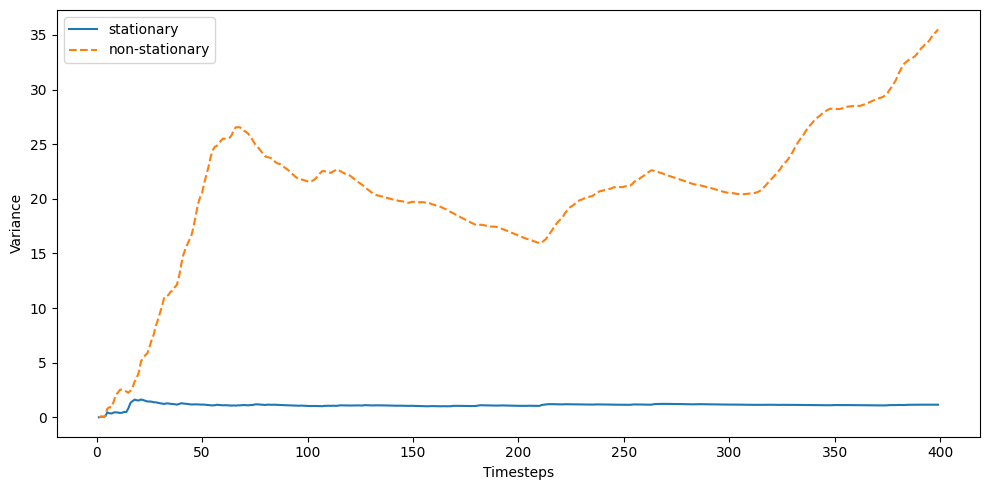

In [50]:
fig, ax = plt.subplots()

ax.plot(stationary_var, label='stationary')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()

In [51]:
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


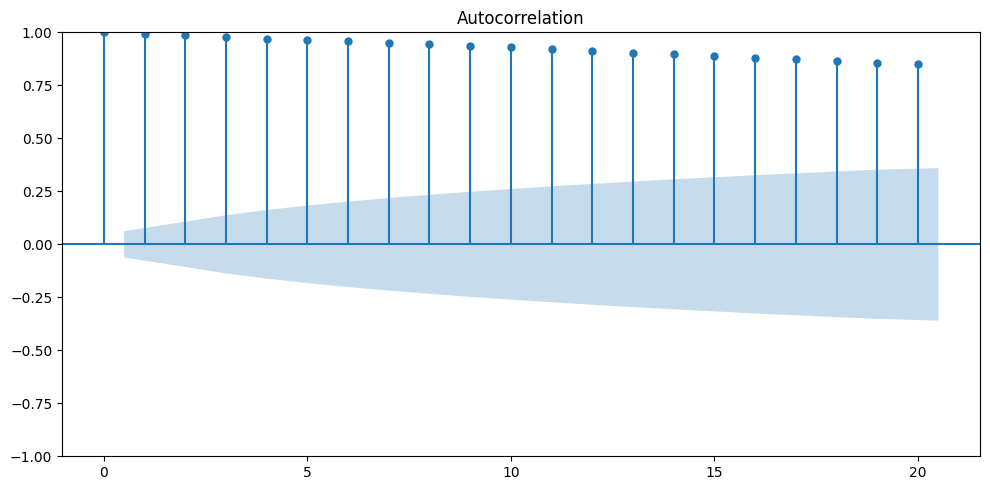

In [52]:
# ACF Plot
plot_acf(random_walk, lags=20);

plt.tight_layout()

In [53]:
diff_random_walk = np.diff(random_walk, n=1)

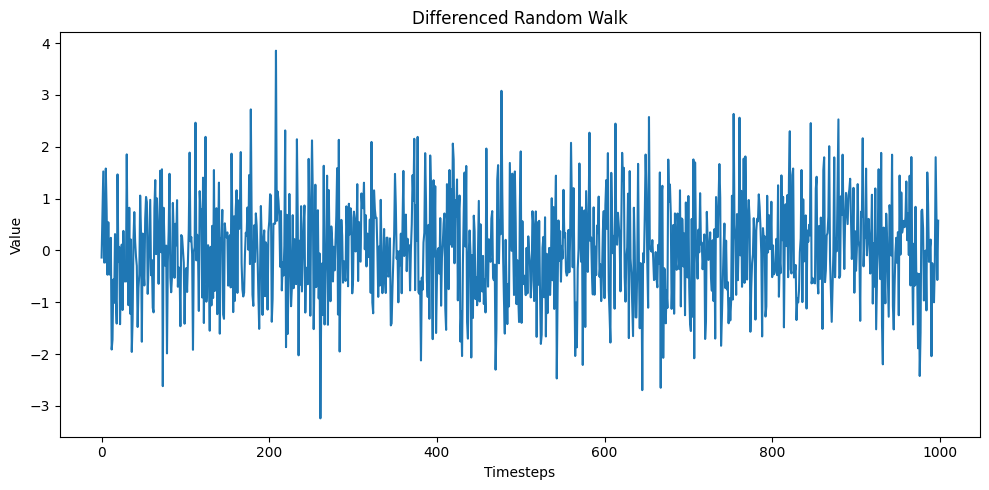

In [54]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

In [55]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.789310857560594
p-value: 0.0


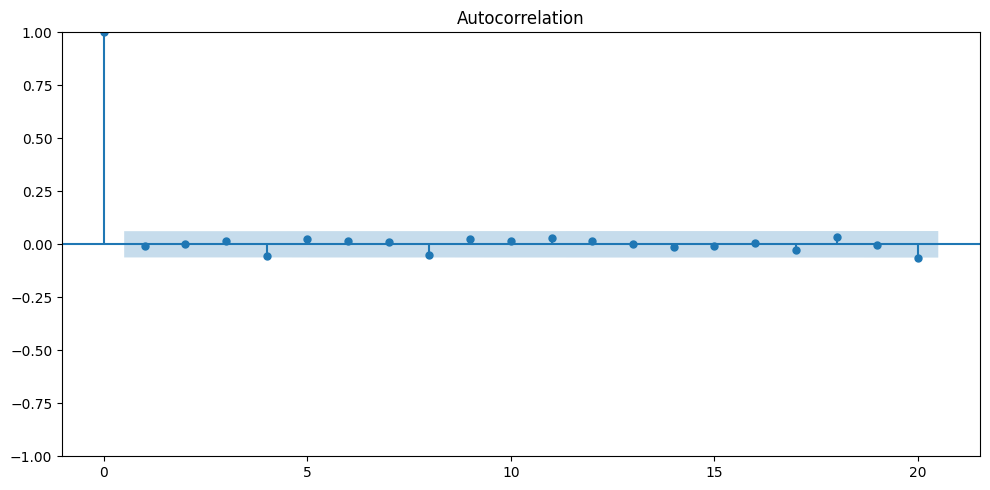

In [56]:
plot_acf(diff_random_walk, lags=20);

plt.tight_layout()

# Exponential Smoothing

In [63]:
df = pd.read_csv("/content/sp500_close.csv", index_col=0, parse_dates=True)
df.head()

AAL     AAPL    AAP   ABBV    ABC    ABT    ACN   ADBE    ADI  \
2013-02-08  14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
2013-02-09    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-10    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-11  14.46  68.5614  78.39  35.85  46.76  34.26  73.07  38.64  46.08   
2013-02-12  14.27  66.8428  78.60  35.42  46.96  34.30  73.37  38.89  46.27   

              ADM  ...   XLNX     XL    XOM   XRAY    XRX    XYL    YUM  \
2013-02-08  30.22  ...  37.51  28.24  88.61  42.87  31.84  27.09  65.30   
2013-02-09    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-10    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-11  30.28  ...  37.46  28.31  88.28  42.84  31.96  27.46  64.55   
2013-02-12  30.81  ...  37.58  28.41  88.46  42.87  31.84  27.95  64.75   

              ZBH   ZION    ZTS  
2013-02-08  75.85  24.14  33.05  
2013-02-09    NaN    NaN    NaN  
2013-02-10    NaN    NaN    NaN  
2013-02-11  75.65  24.21  33.26  
2013-02-12  75.44  24.49  33.74  

[5 rows x 505 columns]

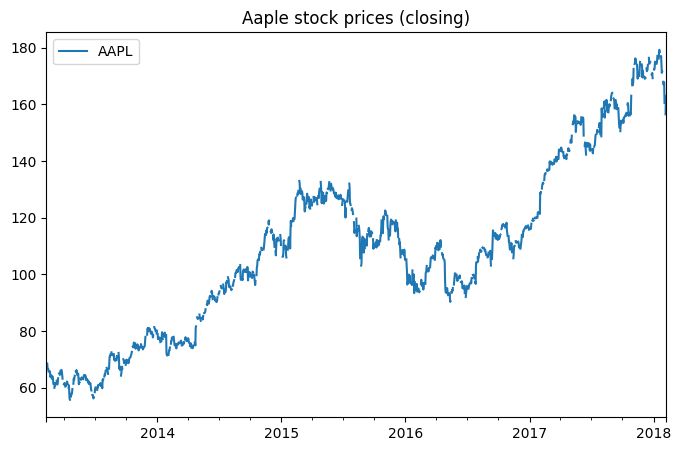

In [64]:
aaple = df[["AAPL"]]
aaple.plot(figsize=(8, 5))
plt.title("Aaple stock prices (closing)");

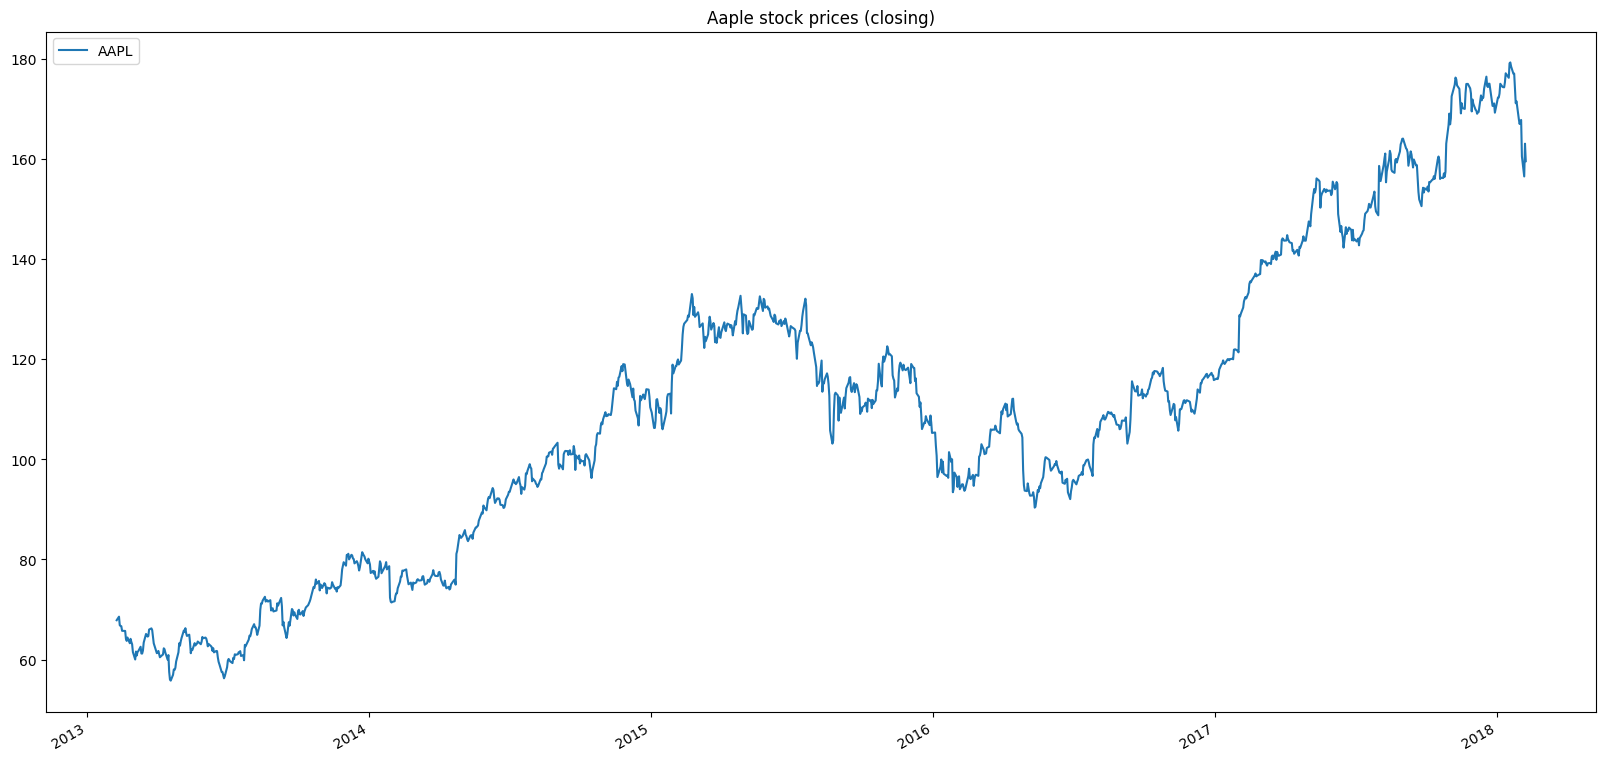

In [65]:
# Handling missing data
aaple = aaple.dropna()
aaple.plot(figsize=(20, 10))
plt.title("Aaple stock prices (closing)");

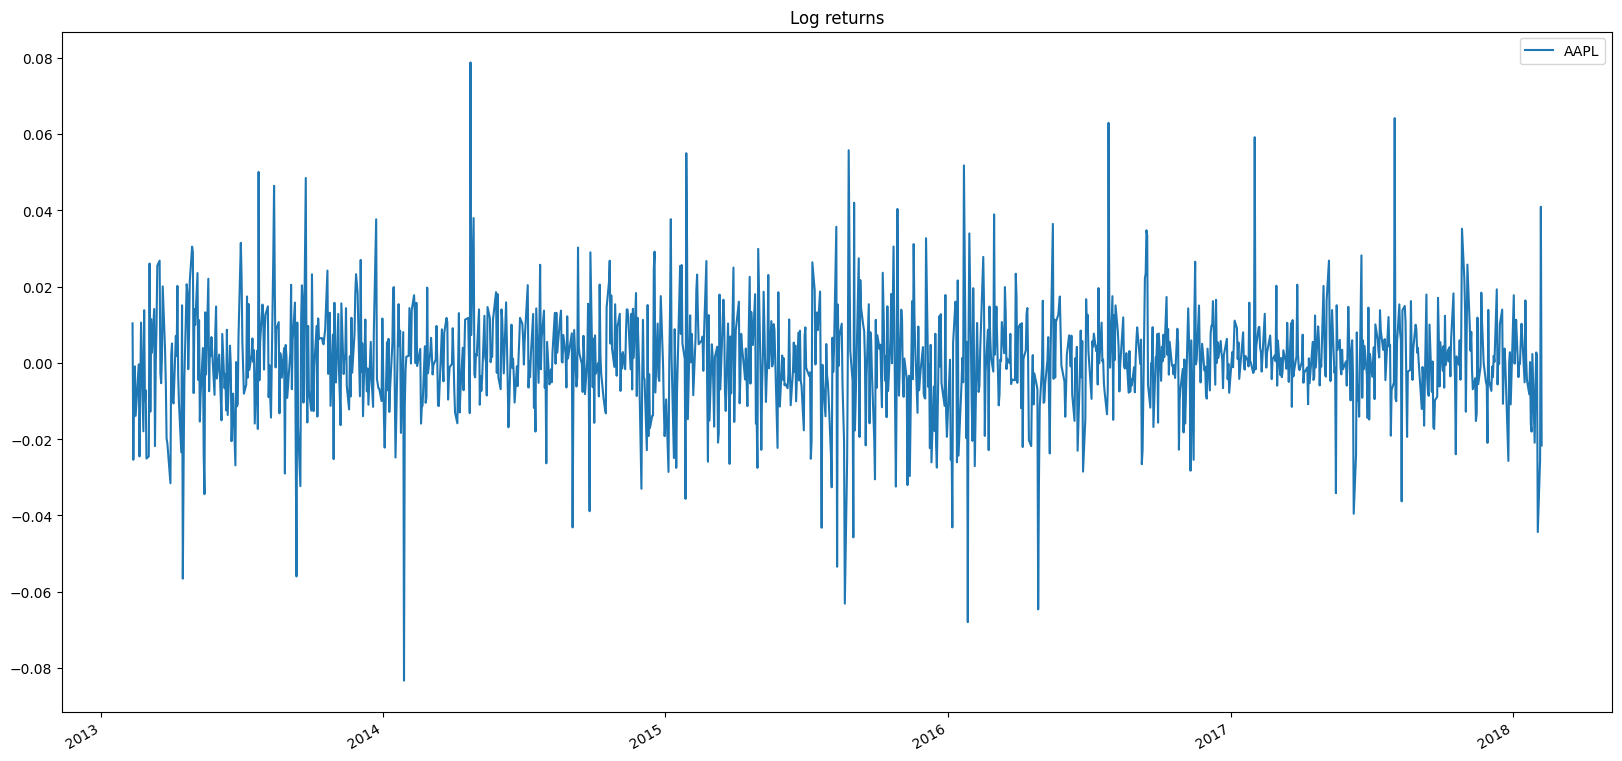

In [66]:
# Log return
np.log(aaple.pct_change() + 1).plot(figsize=(20, 10))
plt.title("Log returns");

<ipython-input-67-69beec8088d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aaple["SMA-7"] = aaple["AAPL"].rolling(7).mean()
<ipython-input-67-69beec8088d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aaple["SMA-30"] = aaple["AAPL"].rolling(30).mean()
<ipython-input-67-69beec8088d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

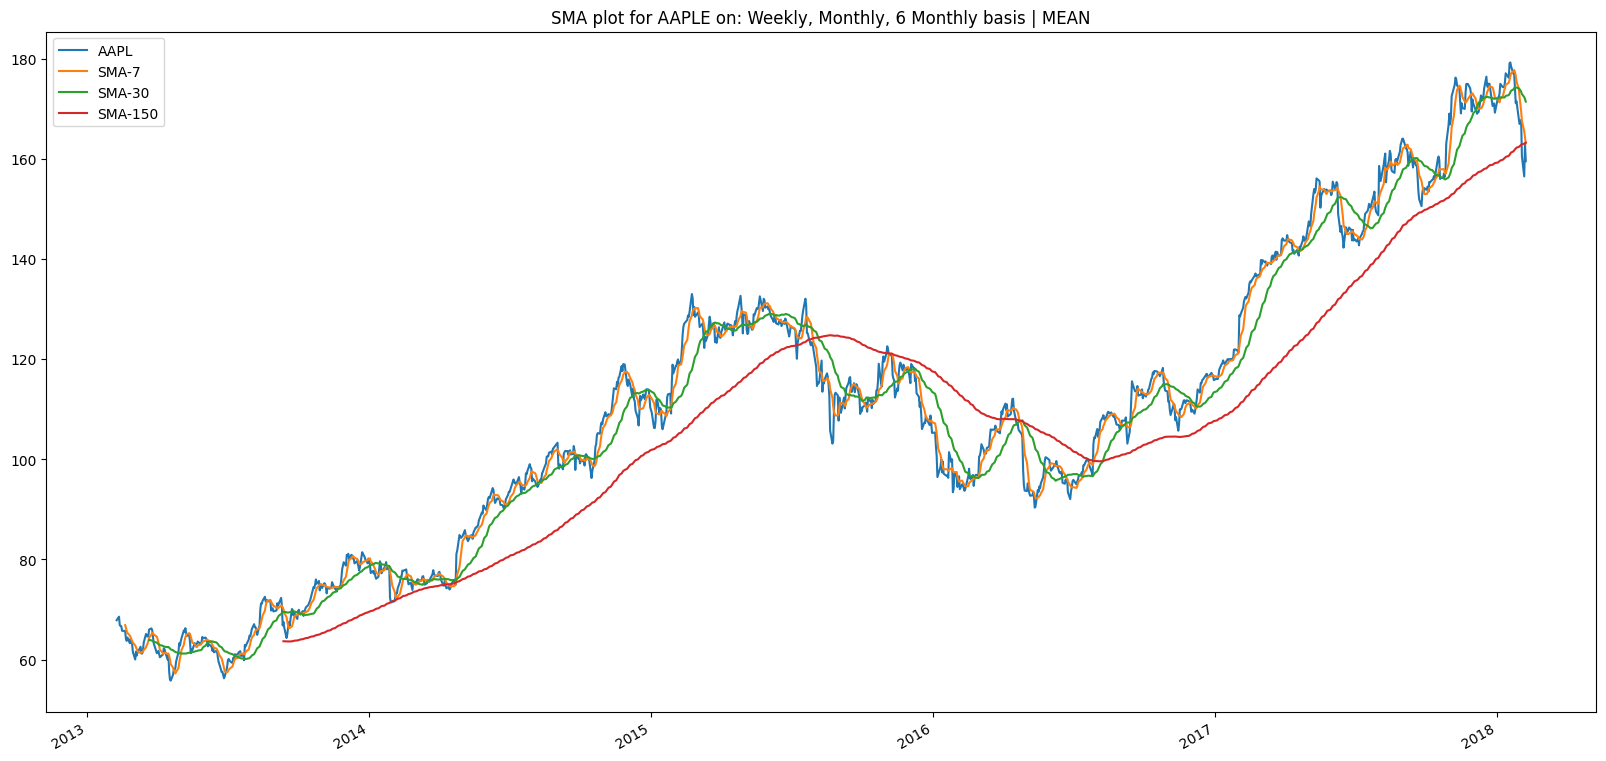

In [67]:
# Moving average
aaple["SMA-7"] = aaple["AAPL"].rolling(7).mean()
aaple["SMA-30"] = aaple["AAPL"].rolling(30).mean()
aaple["SMA-150"] = aaple["AAPL"].rolling(150).mean()
aaple.plot(figsize=(20, 10))
plt.title("SMA plot for AAPLE on: Weekly, Monthly, 6 Monthly basis | MEAN");

In [ ]:
## EWMA

aaple["EWMA - a=0.9"] = aaple["AAPL"].ewm(alpha=0.9).mean()
aaple["EWMA - a=0.5"] = aaple["AAPL"].ewm(alpha=0.5).mean()
aaple["EWMA - a=0.1"] = aaple["AAPL"].ewm(alpha=0.1).mean()

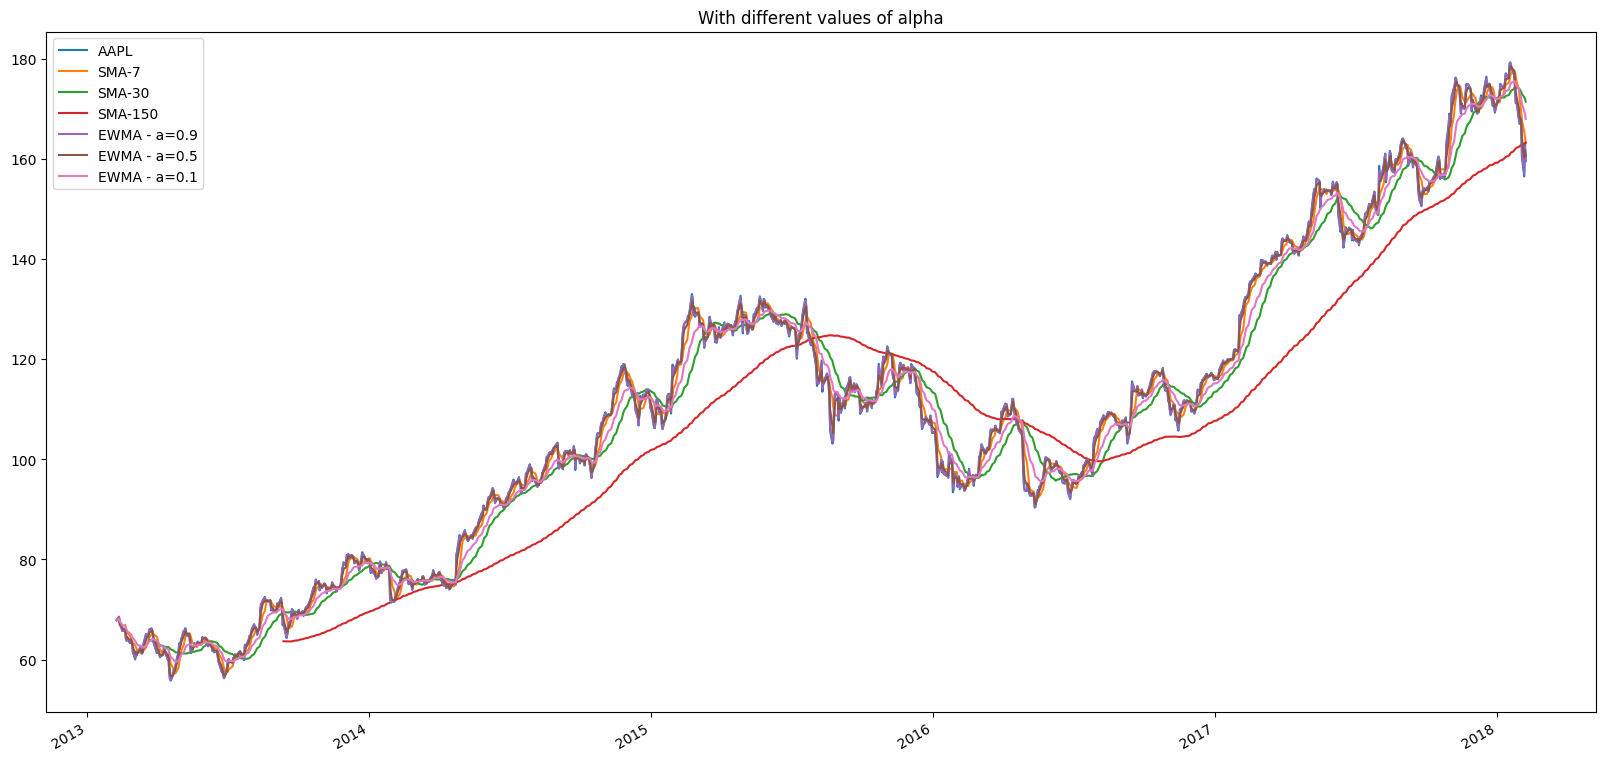

In [69]:
aaple.plot(figsize=(20, 10))
plt.title("With different values of alpha");

#### A Bit of Skeleton With Statsmodels
Till now we have worked with `sklearn` and used fit and predict. Here, the flow changes a bit. Let's have a look.

```python
# Model initialization
model = someModel(param_1=0.1, param_2="euclidean") # sklearn
model = someModel(data) # statsmodels

# Fitting
model.fit(data) # sklearn
model.fit(param_1=0.1, param_2="euclidean") # statsmodels
```
See? Here in `statsmodels` the flow is a bit flipped.

In [72]:
# This is the model that we are going to work with
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
plt.rcParams["figure.figsize"] = (20, 10)

In [73]:
passengers = pd.read_csv("/content/airline_passengers.csv", index_col=0, parse_dates=True)

In [74]:
passengers.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

In [75]:
ses = SimpleExpSmoothing(passengers)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


So, you **see the warnings** right? They are telling that "the model doesn't know that what frequency is there in the data" meaning, is our data spread out monthly? weekly? yearly? 3 yearly? what?

Thus, it *by default* takes the monthly. But in-case of other frequancy that we have in the data, we will need to pass them in the parameter.

In [76]:
# See that the frequency is NONE
passengers.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [77]:
# You can try setting "D", "Y" etc... but that will result an error as it will
# check that `really` the frequancy is there or not, so better to use the  correct one
passengers.index.freq = "MS"

Here `MS` means **Month Start** and the `M` means **Month End**. So, keep that in mind. Or just refer **your** [Time in Pandas](https://github.com/AayushSameerShah/Pandas_Book/tree/main/2.%20Pandas/6.%20TIME) repository!

In [78]:
# Again need to put the data in to reflect the `freq` change
ses = SimpleExpSmoothing(passengers,
                        initialization_method="legacy-heuristic")

Yeah, we are using the `legacy-heuristic` to make it work same as it did in the old versions.

Remember to **give only 1D data** meaning, there should only be single thing to forecast. As here we only have the passengers as the input and to be the thing to be predicted. Otherwise it will give:
```python
ValueError: endog is required to have ndim 1 but has ndim 2
```

In [79]:
alpha = 0.2
result = ses.fit(smoothing_level=alpha, optimized=False)
result

The `optimized=False` is because here the $\alpha$ will stay **constant** and will **not adujust** to minimize the loss function and minimize the error. So, it will work as we have understood in the theory.

Thus here, we have **2** things useful to us:
1. `predict`: Which takes input as **start** and **end** date so we can get any forecast for any date we want.
2. `forecast`: Which does *actual* forecast for `h` steps given

#### `1.` Predict

In [80]:
start =  passengers.index[0]
till =  passengers.index[-1]
print("START: ", start)
print("TILL: ", till)
passengers['SES - Pred'] = result.predict(start, till)

START:  1949-01-01 00:00:00
TILL:  1960-12-01 00:00:00


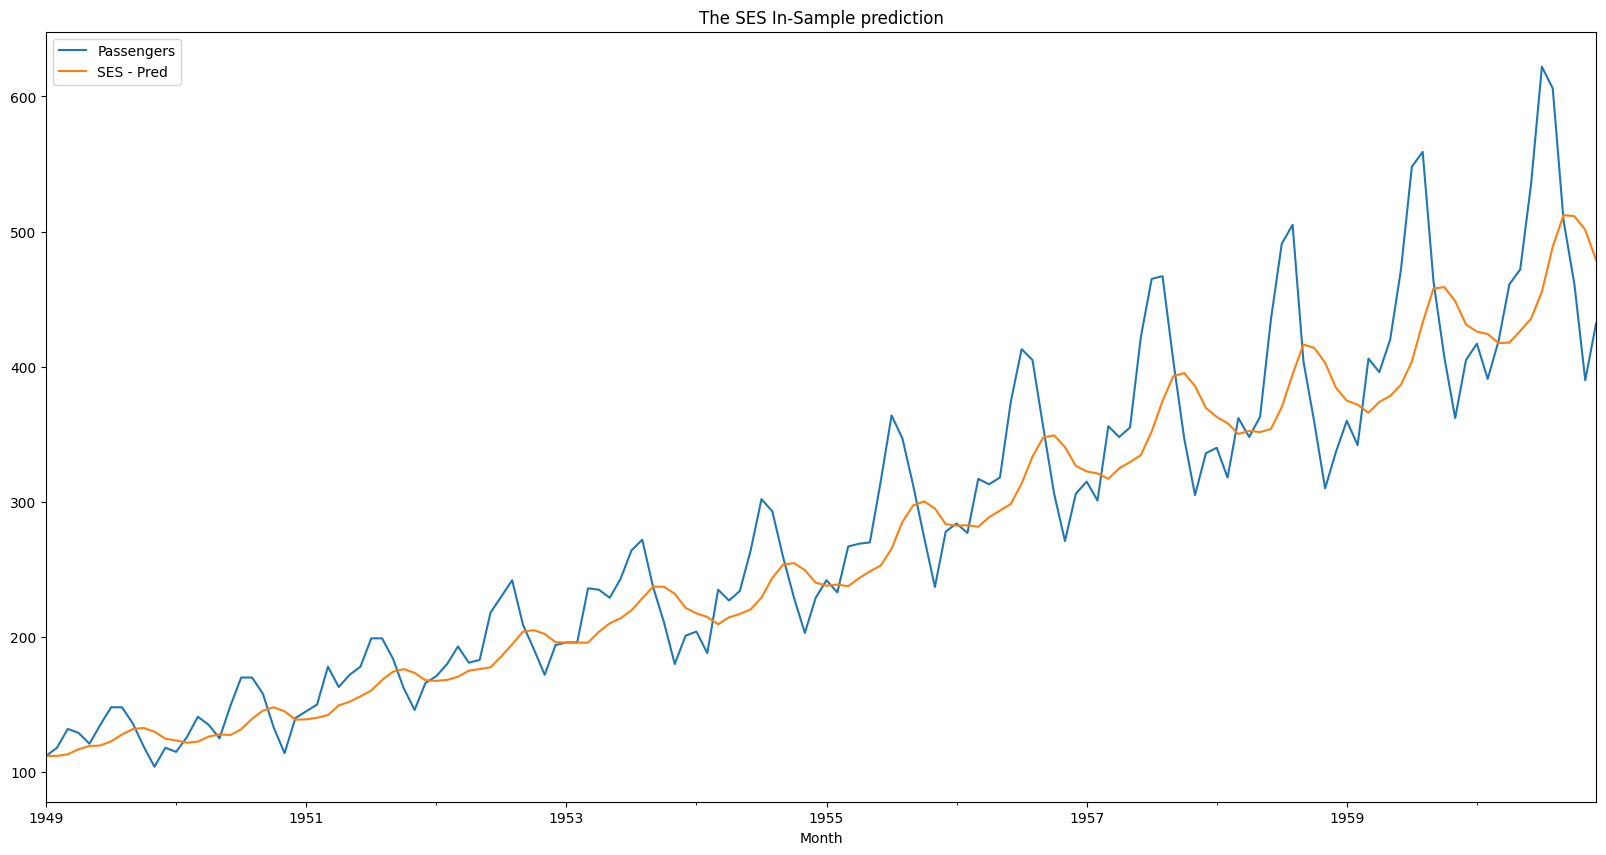

In [81]:
passengers.plot()
plt.title("The SES In-Sample prediction");

Looks like the result that we've got with EWMA, right? <br>
Let's see how EWMA results are...

In [82]:
passengers["EWMA"] = passengers["Passengers"].ewm(alpha=alpha, adjust=False).mean()

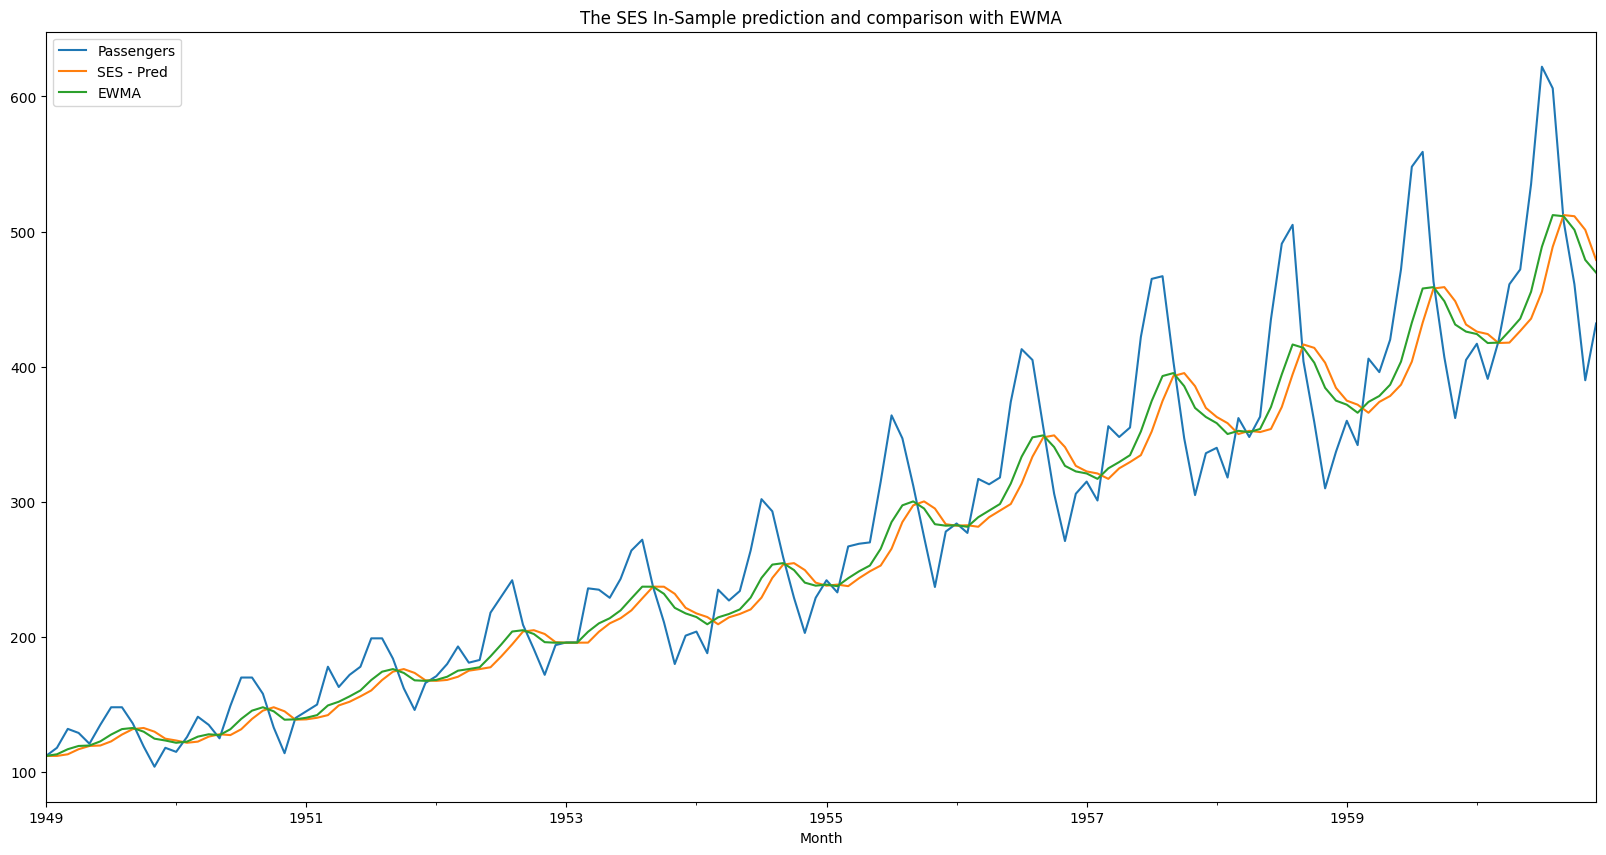

In [83]:
passengers.plot()
plt.title("The SES In-Sample prediction and comparison with EWMA");

We can see that the results of **EWMA** and **SES** are exactly the same but SES is *one step lagging behind*.

In [84]:
result.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

See that the `smoothing_level` is set to be `0.2` and is not changed.

#### `2.` Forecast
Let's try 3 months ahead in time

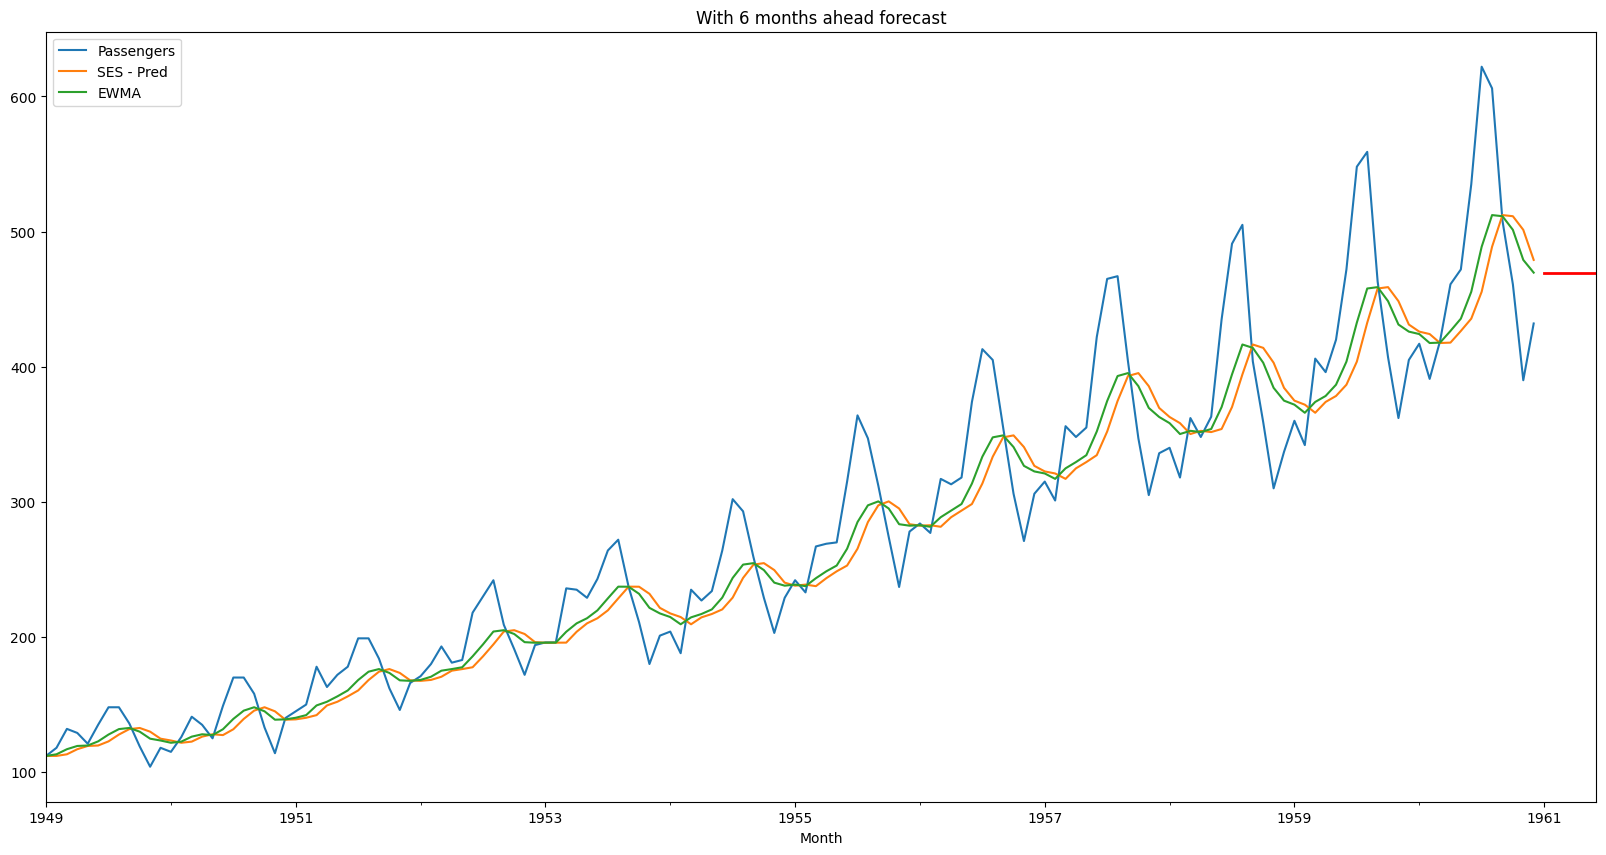

In [85]:
passengers.plot()
result.forecast(6).plot(color='r', lw=2)
plt.title("With 6 months ahead forecast");

### Taking this as the ML approach

See, till here we have taken the **manual** alpha and then based on that `0.2` we have forecast the new points. But, see the alpha might not be the proper one... let's see how it affects if **we would have taken `optimize=True`**.

In [86]:
train = passengers["Passengers"].iloc[:-12] # Leaving last 12 months for testing
test = passengers["Passengers"].iloc[-12:] # Taking last 12 months for testing

In [87]:
ses = SimpleExpSmoothing(train, "legacy-heuristic")

In [88]:
# Note: We are not passing ALPHA
result = ses.fit()

In [89]:
start =  passengers.index[0]
till =  passengers.index[-1]
print("START: ", start)
print("TILL: ", till)
passengers['SES - Pred'] = result.predict(start, till)

START:  1949-01-01 00:00:00
TILL:  1960-12-01 00:00:00


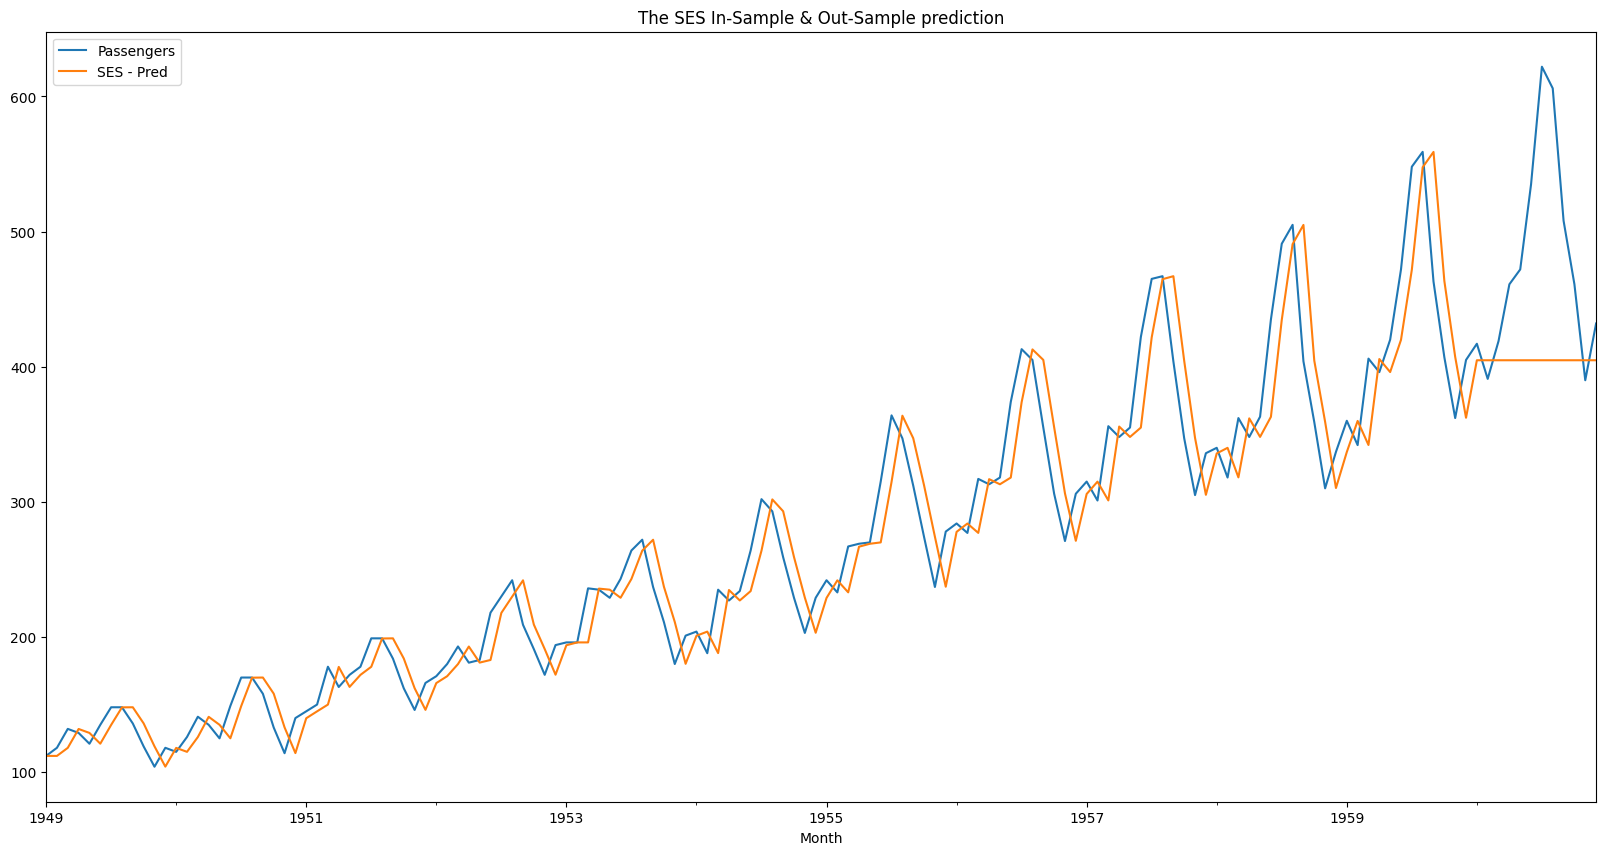

In [90]:
passengers[["Passengers", "SES - Pred"]].plot()
plt.title("The SES In-Sample & Out-Sample prediction");

In [91]:
result.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

See that the `smoothing_level` ie. alpha has been become `0.995`

In [92]:
passengers.tail(15)

Passengers  SES - Pred        EWMA
Month                                         
1959-10-01         407  463.479715  448.522825
1959-11-01         362  407.282399  431.218260
1959-12-01         405  362.226412  425.974608
1960-01-01         417  404.786132  424.179686
1960-02-01         391  404.786132  417.543749
1960-03-01         419  404.786132  417.834999
1960-04-01         461  404.786132  426.467999
1960-05-01         472  404.786132  435.574399
1960-06-01         535  404.786132  455.459520
1960-07-01         622  404.786132  488.767616
1960-08-01         606  404.786132  512.214093
1960-09-01         508  404.786132  511.371274
1960-10-01         461  404.786132  501.297019
1960-11-01         390  404.786132  479.037615
1960-12-01         432  404.786132  469.630092

Note there that **last 12 values** are being predicted there. And at this stage they are the same because we are not using any kind of seasonal component or anything else. Just fine!

## The Holt Model (Linear Version)

## 👓 Holt in Action

In [93]:
from statsmodels.tsa.holtwinters import Holt

In [94]:
# Building the model
holt = Holt(train, initialization_method="legacy-heuristic")

In [ ]:
holt

In [95]:
# Note that we are nither giving the alpha nor the optimize
# as we want to get the minimized error
results = holt.fit()

In [96]:
results.params

{'smoothing_level': 0.9987305298823471,
 'smoothing_trend': 0.0037588177898976497,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

getting the same alpha($\alpha$) : `0.999` **&** also the beta($\beta$) : `0.004`.

And, the real numbers that will be used in will be:
- Level ($l_t$): `112.0`
- Trend ($b_t$): `6.0`

In [97]:
start =  train.index[0]
till =  test.index[-1]
passengers["HOLT"] = results.predict(start, till)

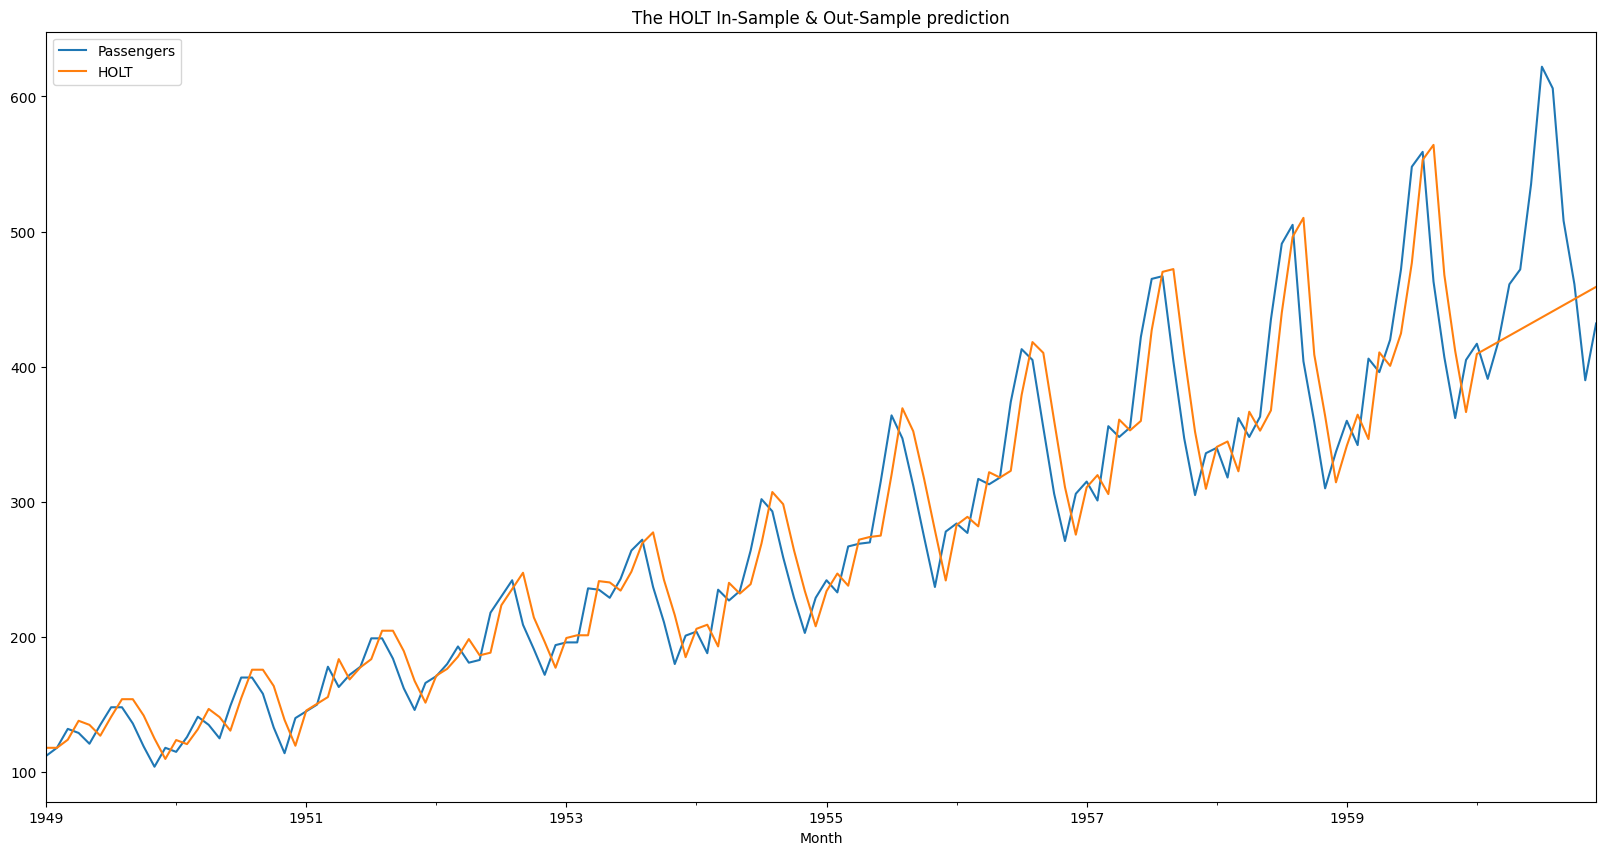

In [98]:
passengers[["Passengers", "HOLT"]].plot()
plt.title("The HOLT In-Sample & Out-Sample prediction");

## 🏂 Holt Winters Model (Seasonal Version)


We started our journey of forecasting with:
- Simple MA
- Exponentially MA

Till now **no** forecasting was done.
- Simple Exponential Smoothing (The EWMA but repeated the last term `h` times) | **No Season, No Trend**
- Holt model (Added the *trend* in the calculation) | **No Season, Yes Trend**

And, now you *might* feel the *real* forecasting. Because it is:
- Holt Winter's model | **Yes Season, Yes Trend**.

In [99]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Getting confused? Why `ExponentialSmoothing`? <BR>
For that, let's revise what we have used till now.
    
```python
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # SES
from statsmodels.tsa.holtwinters import Holt                 # Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt-Winter
```

In [100]:
# See, we are `adding` the seasonal term
model = ExponentialSmoothing(train,
                    trend="add", seasonal="add",
                    initialization_method="legacy-heuristic", seasonal_periods=12)
model

In [101]:
result = model.fit()

In [102]:
result.params

{'smoothing_level': 0.251844132082723,
 'smoothing_trend': 0.0390401802310272,
 'smoothing_seasonal': 0.7481532665335077,
 'damping_trend': nan,
 'initial_level': 225.8181818181818,
 'initial_trend': 1.0833333333333333,
 'initial_seasons': array([-113.81818182, -107.81818182,  -93.81818182,  -96.81818182,
        -104.81818182,  -90.81818182,  -77.81818182,  -77.81818182,
         -89.81818182, -106.81818182, -121.81818182, -107.81818182]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [107]:
start =  train.index[0]
till =  test.index[-1]
passengers["HoltWinters"] = results.predict(start, till)

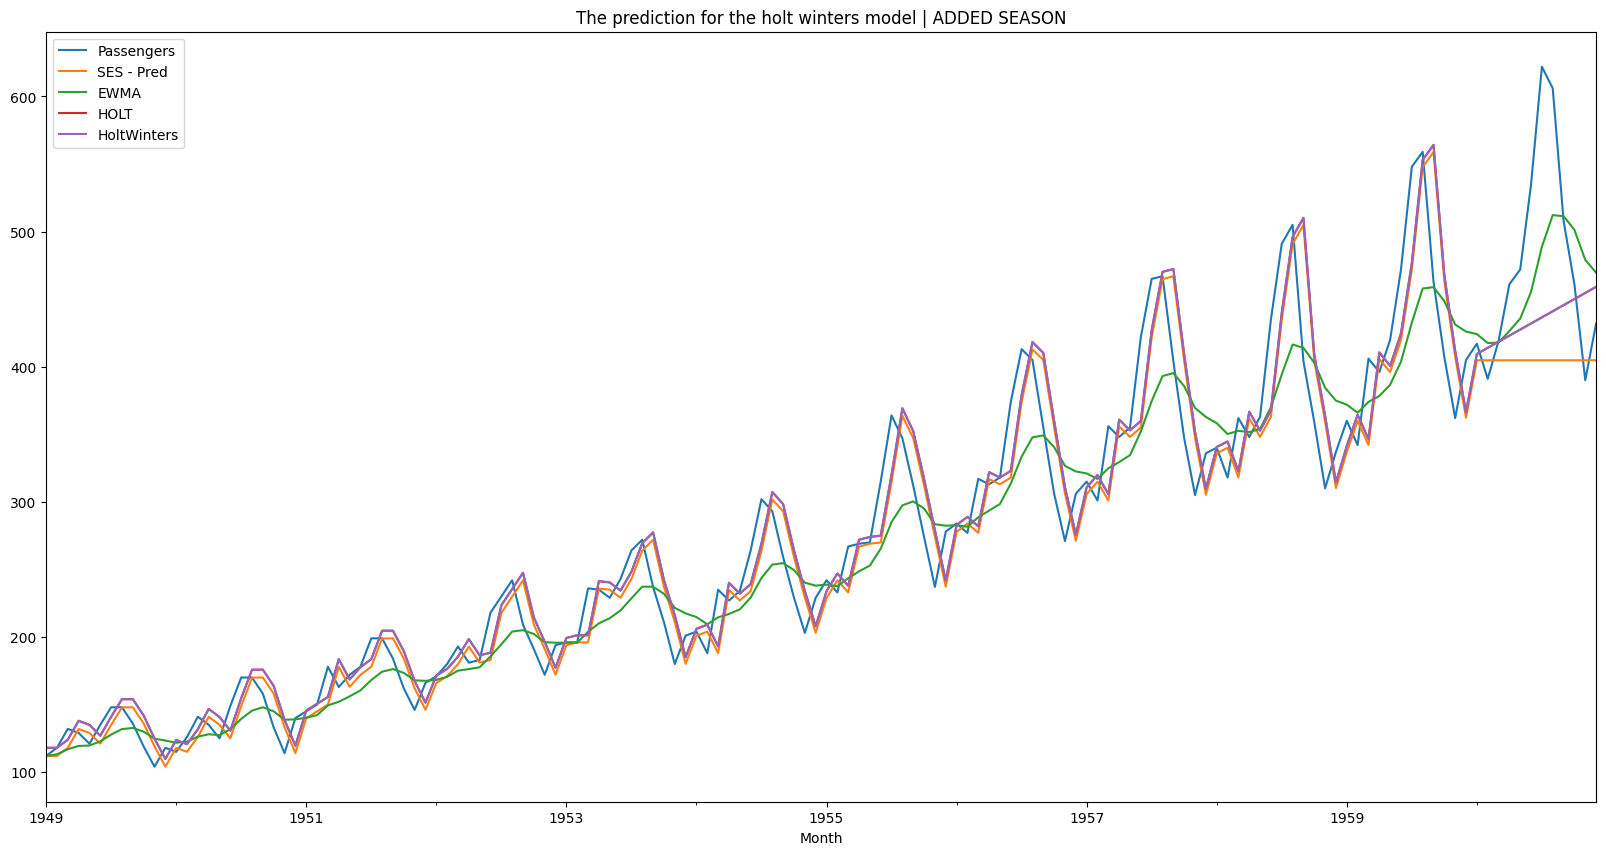

In [108]:
passengers.plot()
plt.title("The prediction for the holt winters model | ADDED SEASON");

Now we are getting somewhere!!!!

In [109]:
from sklearn.metrics import mean_squared_error

In [110]:
print("Train Error: ", mean_squared_error(train, result.fittedvalues, squared=False))
print("Test Error: ", mean_squared_error(test, result.forecast(12), squared=False))

Train Error:  11.853000976828765
Test Error:  15.543003084126884


The test error, meaning the forecast error is a bit high...

Let's now check, with the `multiplicative` method.

In [111]:
model = ExponentialSmoothing(train,
                    trend="add", seasonal="mul",
                    initialization_method="legacy-heuristic",
                    seasonal_periods=12)

result = model.fit()
start = train.index[0]
till =  test.index[-1]
passengers["HOLTWinter_Multiplicative"] = results.predict(start, till)

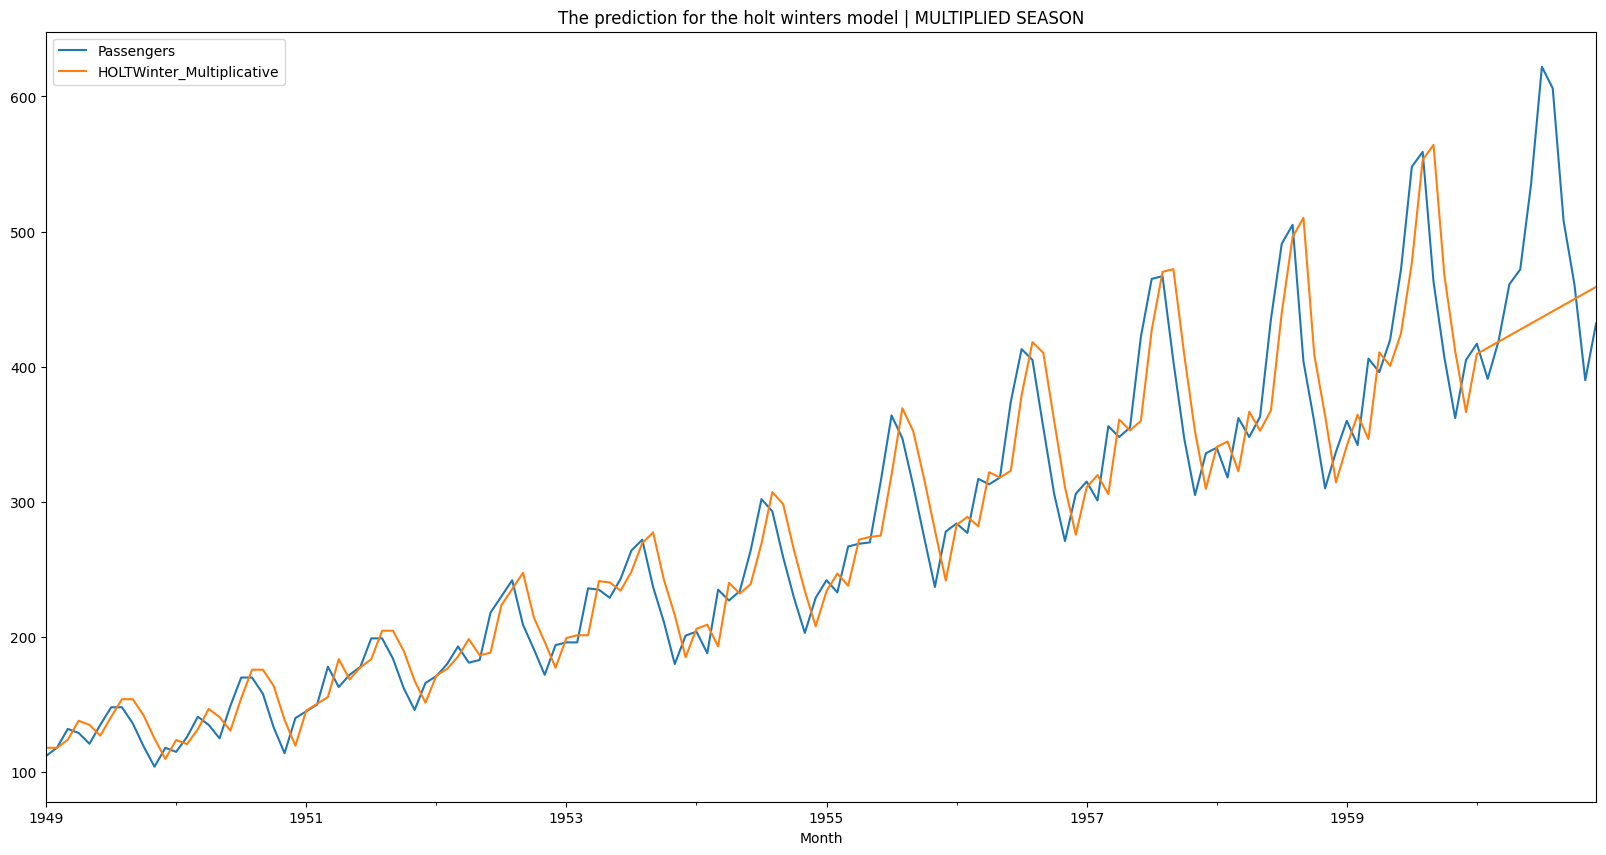

In [112]:
passengers[["Passengers", "HOLTWinter_Multiplicative"]].plot()
plt.title("The prediction for the holt winters model | MULTIPLIED SEASON");

In [113]:
print("Train Error: ", mean_squared_error(train, result.fittedvalues, squared=False))
print("Test Error: ", mean_squared_error(test, result.forecast(12), squared=False))

Train Error:  10.153934838980392
Test Error:  16.535212108255575


> Thing to note that, we are **no longer** lagging behind! Meaning, the predicted values are **not shifted** behind!

In [114]:
result.params

{'smoothing_level': 0.31880474811683734,
 'smoothing_trend': 0.04137712972152417,
 'smoothing_seasonal': 0.672160916340147,
 'damping_trend': nan,
 'initial_level': 225.8181818181818,
 'initial_trend': 1.0833333333333333,
 'initial_seasons': array([0.49597424, 0.52254428, 0.58454106, 0.57125604, 0.53582931,
        0.59782609, 0.65539452, 0.65539452, 0.60225443, 0.52697262,
        0.4605475 , 0.52254428]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# ARIMA Models

In [3]:
# Starting with an AR model
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("/content/airline_passengers.csv", index_col=0, parse_dates=True)
df = df.Passengers
df.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [5]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [6]:
train = train.values.reshape(-1)

In [7]:
# taking p=5 meaning we will build X and y with
# a gap of 5. Thus the columns will be 5.
p = 5
X = []
y = []
for i in range(0, len(train) - p):
    X.append(train[i:p+i].tolist())
    y.append(train[p+i])

In [8]:
X = np.array(X)
y = np.array(y)

In [9]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
preds = []
Xt = X[-1].reshape(1, -1)
for i in range(12):
    pred = model.predict(Xt)[0]
    preds.append(pred)
    Xt = np.c_[Xt, pred][0, -p:].reshape(1, -1)

In [11]:
preds = pd.Series(preds, index=test.index)

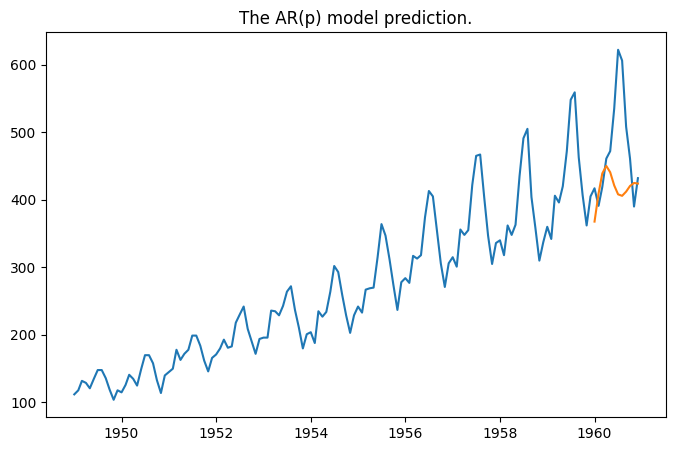

In [12]:
plt.plot(df)
plt.plot(preds)
plt.title("The AR(p) model prediction.");

#### ARIMA (p, d, q)

### ✨ Special Cases of ARIMA
The previous models are the special cases of ARIMA! Here's how.

#### 1️⃣ ARIMA(p, 0, 0)
This is the **`AR(p)`** model!
- No differencing, no error learning
- Just the pure AR(p)

#### 2️⃣ ARIMA(0, 0, q)
This is the **`MA(q)`** model!
- No differencing, no auto-regressive learning
- Just the pure MA(q)

#### 3️⃣ ARIMA(0, d, 0)
This is the **`I(d)`** model!
- auto-regressive learning, no error learning
- Just the pure I(d)

#### 4️⃣ Random Walk — ARIMA(0, 1, 0)
This is the **`I(1)`** model, but it has a special meaning.

## $\Delta y_t = \varepsilon_t$
It says, *"The difference at point $t$ is equivalent to the error $\varepsilon$ at time $t$"*.

That can be re-written as ↓
## $y_t  - y_{t-1} = \varepsilon_t$
And thus ↓
## $y_t = y_{t-1} + \varepsilon_t$

**Do you see something?** That $y_t = y_{t-1} + \varepsilon_t$ is the ***random walk*** formulae! Which simply means that the upcoming value in the time-series depends on the exacly **single past** value and the noise.

Thus, $\Delta y_t = \varepsilon_t$ means, if we take the difference between two datapoins, we are only left with the natural error at that point in time.

In future if we find that the ARIMA(0, 1, 0) is the best model, then it means that the given time-series follows the random walk.

In [13]:
from statsmodels.tsa.arima.model import ARIMA

#### First off, let's see how it behaves with our simple model `ARIMA(1, 0, 0)` which means:
> The upcoming value only depends on the previous value. Just like the random-walk model. `AR(1)`.

In [14]:
df = pd.read_csv("/content/airline_passengers.csv", index_col=0, parse_dates=True)
df.index.freq = "MS"
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

In [15]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [16]:
model = ARIMA(train, order=(1, 0, 0))

In [17]:
result = model.fit()

The `result.forecast` will return simple forecast.

But, this time we will need the following 3 things:
1. Real forecast
2. Std Error
3. Confidence interval

To have them we will haveto use the `result.get_forecast` and the object that is returned will contain those 3 things.<br>
So, we will use `1.` and `3.` to show in the plot.

In [18]:
# simply the forecast values
result.forecast(12)

1960-01-01    399.554855
1960-02-01    394.317763
1960-03-01    389.280774
1960-04-01    384.436243
1960-05-01    379.776815
1960-06-01    375.295420
1960-07-01    370.985253
1960-08-01    366.839773
1960-09-01    362.852687
1960-10-01    359.017943
1960-11-01    355.329721
1960-12-01    351.782421
Freq: MS, Name: predicted_mean, dtype: float64

In [19]:
forecast_results = result.get_forecast(12)

In [20]:
# the real forecast
forecasts = forecast_results.predicted_mean
forecasts

1960-01-01    399.554855
1960-02-01    394.317763
1960-03-01    389.280774
1960-04-01    384.436243
1960-05-01    379.776815
1960-06-01    375.295420
1960-07-01    370.985253
1960-08-01    366.839773
1960-09-01    362.852687
1960-10-01    359.017943
1960-11-01    355.329721
1960-12-01    351.782421
Freq: MS, Name: predicted_mean, dtype: float64

In [21]:
# the conf interval
conf_interval = forecast_results.conf_int()
conf_interval

lower Passengers  upper Passengers
1960-01-01        338.658210        460.451500
1960-02-01        309.826171        478.809354
1960-03-01        287.732168        490.829379
1960-04-01        269.338256        499.534230
1960-05-01        253.432284        506.121347
1960-06-01        239.373402        511.217437
1960-07-01        226.768868        515.201638
1960-08-01        215.354570        518.324977
1960-09-01        204.941150        520.764224
1960-10-01        195.386337        522.649550
1960-11-01        186.579356        524.080085
1960-12-01        178.431515        525.133327

In [22]:
forecasts = pd.Series(forecasts, index=test.index)

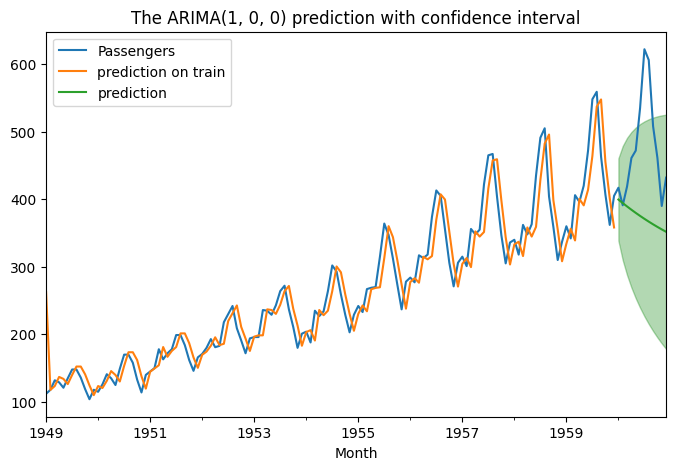

In [23]:
df.plot(label="real data")
result.predict(train.index[0], train.index[-1]).plot(label="prediction on train")
forecasts.plot(label="prediction")
plt.fill_between(forecasts.index,
                 conf_interval.iloc[:, 0],
                 conf_interval.iloc[:, 1],
                 alpha=0.3,
                 color="green")

plt.legend()
plt.title("The ARIMA(1, 0, 0) prediction with confidence interval");

In [24]:
def get_and_plot(result, h, title=None, original_data=None):
    """
    This function will take the result and then from the learnd values,
    it will make forecast (in-sample and out-sample).

    Then it will plot the result!
    """
    forecast_result = result.get_forecast(h)
    forecast_index = pd.date_range(test.index[0], periods=h, freq="MS")
    pred = forecast_result.predicted_mean
    pred = pd.Series(pred, index=forecast_index)
    conf_int = forecast_result.conf_int()


    # doing this so that we can pass data with other scale
    # that will come below once we will reach at the "trans
    # -formation section in this book.
    if isinstance(original_data, pd.DataFrame):
        original_data.plot()
    else:
        df.plot(label="real data")

    # [1:] because fittedvalues will have very first values as 0.00
    result.fittedvalues[1:].plot(label="prediction on train")
    pred.plot(label="prediction")
    plt.fill_between(pred.index,
                     conf_int.iloc[:, 0],
                     conf_int.iloc[:, 1],
                     alpha=0.2,
                     color="green")

    plt.legend()
    if title:
        plt.title(title);
    else:
        plt.title("The prediction with confidence interval");

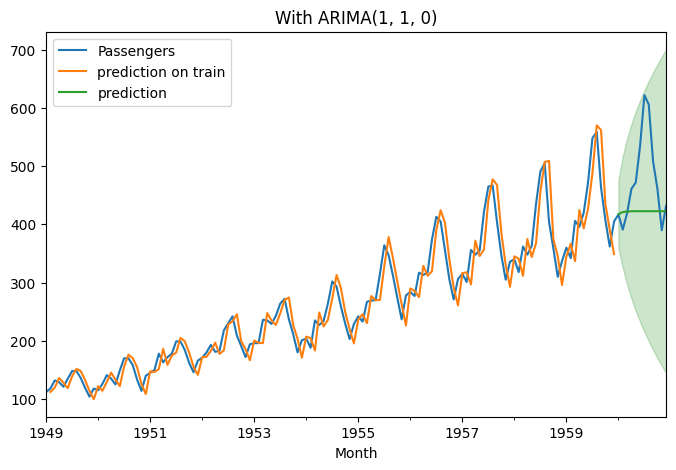

In [25]:
arima_110 = ARIMA(train, order=(1, 1, 0))
result_110 = arima_110.fit()
get_and_plot(result_110, 12, "With ARIMA(1, 1, 0)")

This plot can confirm that differenciancing can cause the time-series to be more flat... here we have taken `d=1`.

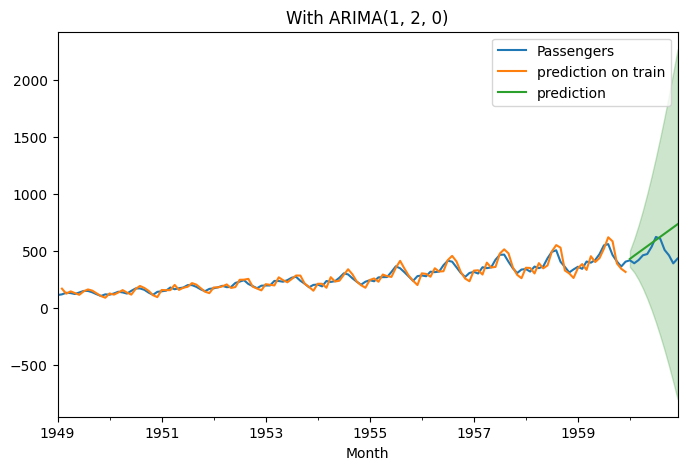

In [26]:
arima_120 = ARIMA(train, order=(1, 2, 0))
result_120 = arima_120.fit()
get_and_plot(result_120, 12, "With ARIMA(1, 2, 0)")

Differencing more will cause values to fluctuate more!

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


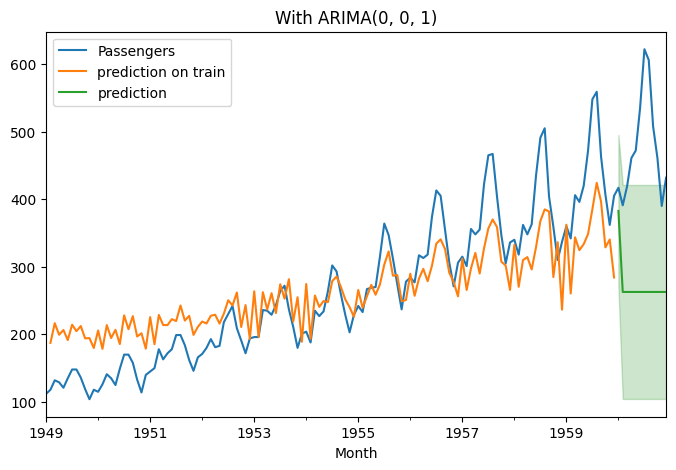

In [27]:
arima_001 = ARIMA(train, order=(0, 0, 1)) #MA(1)
result_001 = arima_001.fit()
get_and_plot(result_001, 12, "With ARIMA(0, 0, 1)")

This model means we are only depending on the past single error... and that is much much worse!

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


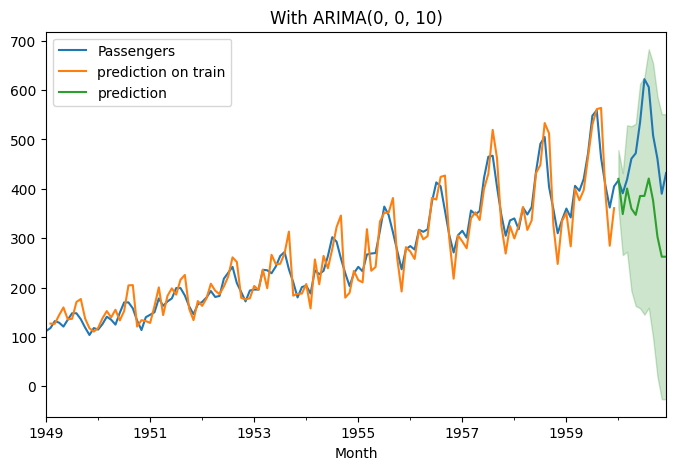

In [28]:
arima_0010 = ARIMA(train, order=(0, 0, 10))
result_0010 = arima_0010.fit()
get_and_plot(result_0010, 12, "With ARIMA(0, 0, 10)")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


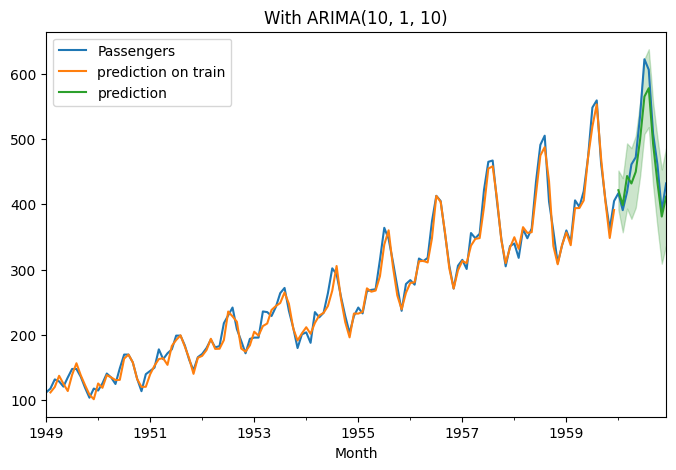

In [29]:
arima_10110 = ARIMA(train, order=(10, 1, 10))
result_10110 = arima_10110.fit()
get_and_plot(result_10110, 12, "With ARIMA(10, 1, 10)")

Much better! Like that's what we have to see... I have tried to follow the natural pattern here. Our data repeats after 12 months *(yeah here I have takeon only 10 but will see)* and so have treid to keep them as it is.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


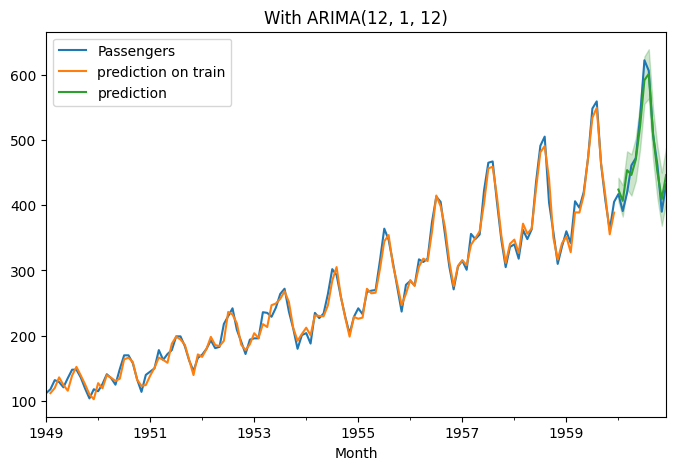

In [30]:
arima_12112 = ARIMA(train, order=(12, 1, 12))
result_12112 = arima_12112.fit()
get_and_plot(result_12112, 12, "With ARIMA(12, 1, 12)")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


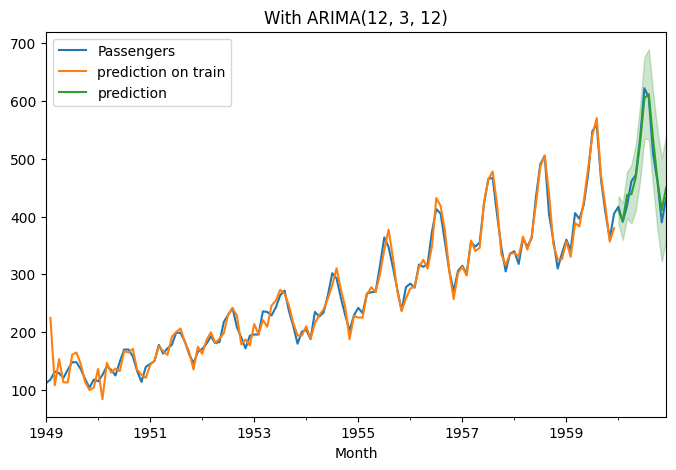

In [31]:
arima_12312 = ARIMA(train, order=(12, 3, 12))
result_12312 = arima_12312.fit()
get_and_plot(result_12312, 12, "With ARIMA(12, 3, 12)")

Differencing made life much easier! But: ***"Don't apply more differencing. It should not be more than 2"***.

# Auto ARIMA

### Getting the sub-optimal model
ACF and PACF *(also Dicky-test)* help use a lot deciding the `p`, `d` and `q`  values *(not respectively)*.

In [32]:
!pip install pmdarima
import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00


This is gonna be great, let's see how.

In [33]:
data = pd.read_csv("/content/airline_passengers.csv", index_col=0, parse_dates=True)
data = data.iloc[:, 0]

In [34]:
data.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [35]:
# train and test
train_idx = data.iloc[:-12].index
test_idx = data.iloc[-12:].index

In [36]:
simple_autoARIMA = pm.auto_arima(data[train_idx],
                                seasonal=False,
                                stepwise=True,
                                trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=2.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1276.259, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.10 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1225.563, Time=1.53 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 16.44

See that, we have kept:
- `seasonality=False` which by default is True.
- `trace=True` which print out the model information while training different ones.
- `stepwise=True` which by default is true, but here to show that there is an option. If `False` it would go for full gridSearch and that would have taken longer time as it tests all possible combinations.

It seems like AutoARIMA has found `ARIMA(2, 1, 2)` as the best / optimal model. Also the thing to note here is that: there is **another piar** of brackets `(0, 0, 0)[0]` which shows that **we have not taken any seasonality** into consideration. So, it is simple ARIMA model 😀

#### Let's make predictions and see accuracy

In [37]:
simple_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -603.341
Date:                Fri, 07 Jun 2024   AIC                           1218.683
Time:                        01:55:31   BIC                           1235.934
Sample:                    01-01-1949   HQIC                          1225.692
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7157      0.212      3.379      0.001       0.301       1.131
ar.L1          1.6431      0.028     57.904      0.000       1.587       1.699
ar.L2         -0.9129      0.027    -33.338      0.000      -0.967      -0.859
ma.L1         -1.8478      0.036    -51.463      0.000      -1.918      -1.777
ma.L2          0.9466      0.038     24.988      0.000       0.872       1.021
sigma2       564.8460     67.205      8.405      0.000     433.126     696.566
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 1.87
Prob(Q):                              0.36   Prob(JB):                         0.39
Heteroskedasticity (H):               6.40   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

See that the AIC and BIC are also given, but again without comparision — they are useless.

In [38]:
# the .predict will take `h` values as integer to predict after the training data
# and if said `return_conf_int=True` then the confidence interval will be returned
predictions_out_sample, conf_interval = simple_autoARIMA.predict(n_periods=12, return_conf_int=True)

In [39]:
# Now, the insample predictions. This is the same as using `.fittedvalues` in ARIMA
# here we can give the zero indexed values from 0 to -1 (end of training data)
# With this function, we can also generate out-sample if the `end` is large than train

# start=1 instead of 0 is beacause the differencing is `1` in the model and it requires
# to have start more than `d`.
predictions_in_sample = simple_autoARIMA.predict_in_sample(start=1, end=-1)

#### Now, let's plot them in the graph

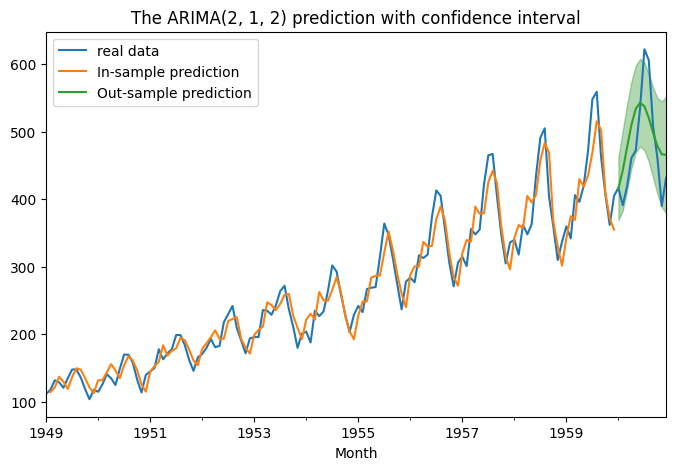

In [40]:
data.plot(label="real data")
pd.Series(predictions_in_sample,
          index=train_idx[1:]).plot(label="In-sample prediction")

pd.Series(predictions_out_sample,
         index=test_idx).plot(label="Out-sample prediction")

plt.fill_between(test_idx,
                 conf_interval[:, 0],
                 conf_interval[:, 1],
                 alpha=0.3,
                 color="green")

plt.legend()
plt.title("The ARIMA(2, 1, 2) prediction with confidence interval");

In [41]:
from sklearn.metrics import mean_squared_error as mse

In [42]:
mse(data[test_idx], predictions_out_sample)

2839.876036705329

## 2️⃣ Simple ARIMA (no seasonality - but with GridSearch)

We might not have given it enough time to search, so let's make `Stepwise=False`.

In [43]:
simple_autoARIMA_2 = pm.auto_arima(data[train_idx],
                                seasonal=False,
                                stepwise=False,
                                trace=True)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1261.216

Still it gives the (2, 1, 2) as a good model.

## Dates Sales Exercise

Have been really a long time since we haven't applied our ARIMA to the actual data. Yes we did in the **airline** passengers data but still here I will try to bring other stuff as well like making sense of it and checking the ***PACF***, ***ACF*** and ***Dciky-Fuller*** test by ourselves.

Let's see how.

In [ ]:
# ususal imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)

# the modelling imports
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm


# to check error
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

# to supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the data in
df = pd.read_csv("/content/Dates.csv", index_col=0,
                 parse_dates=True, names=["Sales"],
                 skiprows=1)
df.head()

Sales
1964-01  2815.0
1964-02  2672.0
1964-03  2755.0
1964-04  2721.0
1964-05  2946.0

In [ ]:
df = df["Sales"]

In [ ]:
# checking the number of NaN values
df.isna().sum()

2

In [ ]:
df.dropna(inplace=True)

In [ ]:
# again checking the NaN values
df.isna().sum()

0

In [ ]:
df.shape

(105,)

Now, we are left with only `105` rows in the data and the data frequency is **monthly**; so let's just set that up as well.

In [ ]:
# since the `parse=True` didn't work well, we will make the datetime out of it
df.index = pd.to_datetime(df.index, format="%Y-%m")

In [ ]:
df.index.freq = "MS"

In [ ]:
# splitting into training and testin
train_idx = df.iloc[:-12].index
test_idx = df.iloc[-12:].index

In [ ]:
# Let's see how the data looks like!
df.plot()
plt.title("Monthly sales data")
plt.xlabel("← Year →", labelpad=20)
plt.ylabel("← Sales →", labelpad=20);

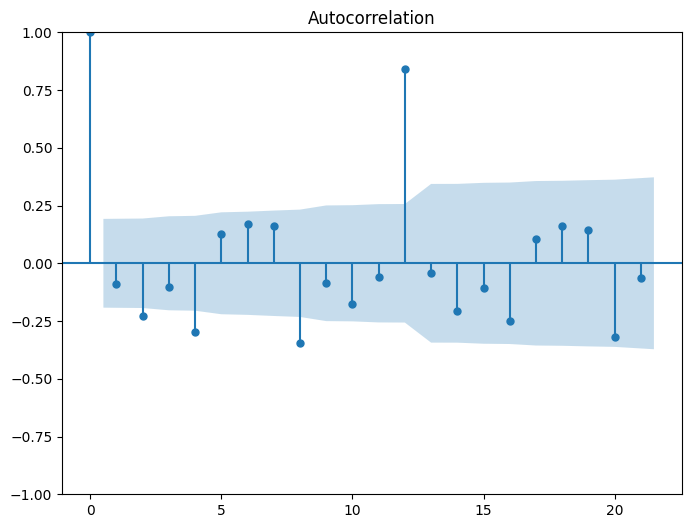

In [ ]:
# ACF Test
plot_acf(df.diff().dropna());

Oh my! We can set the `q` to **12**. And that is clear by this point. Let's see about `p`.

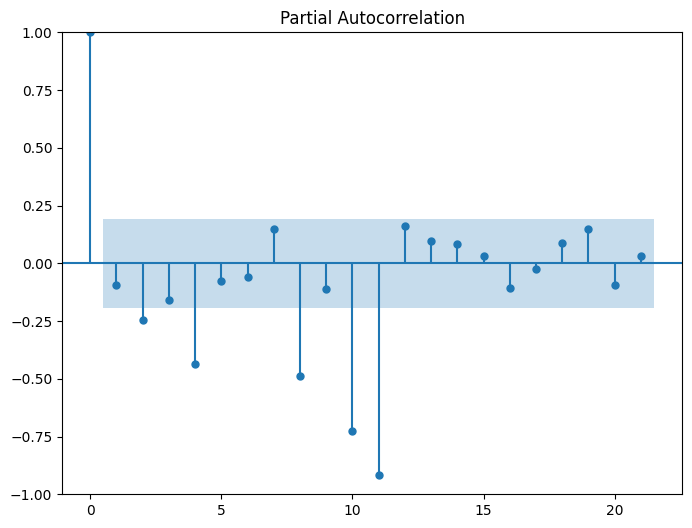

In [ ]:
## PACF Test
plot_pacf(df.diff().dropna(), method="ols");

It indicates that our data has highest dependency for the 11 points in the past. Strange that there is **only a little** spike on the 12th $\tau$. But we can choose between 11 and 12.

In [ ]:
## Dicky Fuller Test
adfuller(df)

(-1.8335930563276215,
 0.36391577166024586,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

Here we can see that the `p-value` is way higher than our critical threshold. It is `0.36391`. So, we can fail-to-reject the null hypothesis and say the time-series should be ***non-stationary***. So, we couldn't trust on our eyeballs 👏

In [ ]:
adfuller(df.diff().dropna())

(-7.189896448050999,
 2.519620447387081e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1466.8267262915895)

Now, it is stationary, so we can work with it.

#### Manual Modelling

In [ ]:
# Creating the inital model accoring to our hypothesis
model = ARIMA(df[train_idx], order=(12, 1, 11))
result = model.fit()


insample_prediction = result.fittedvalues
forecast = result.get_forecast(12)
conf_interval = forecast.conf_int()
outsample_prediction = forecast.predicted_mean

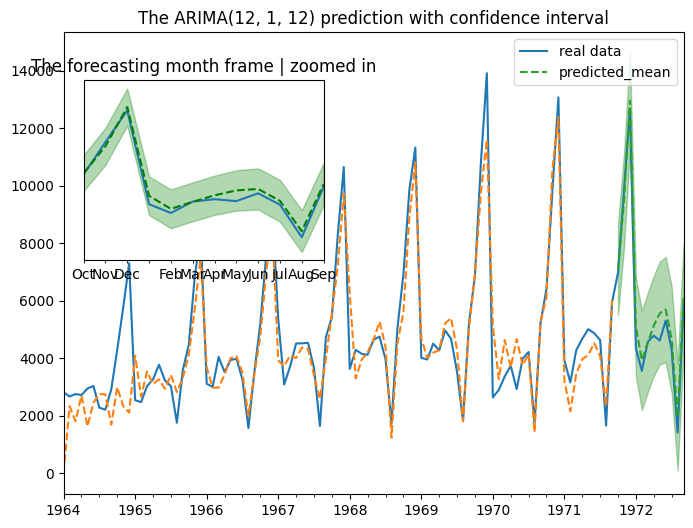

In [ ]:
# the plotting code
main_axes = plt.axes()
small_axes = plt.axes([.15,.5,.3,.3])


df.plot(label="real data", ax=main_axes)
insample_prediction.plot(ax=main_axes, ls='dashed')
outsample_prediction.plot(ax=main_axes, ls='dashed')

main_axes.fill_between(outsample_prediction.index,
                 conf_interval.iloc[:, 0],
                 conf_interval.iloc[:, 1],
                 alpha=0.3,
                 color="green")

df[test_idx].plot(ax=small_axes)
outsample_prediction.plot(ax=small_axes, ls='dashed', color="green")

small_axes.fill_between(outsample_prediction.index,
                 conf_interval.iloc[:, 0],
                 conf_interval.iloc[:, 1],
                 alpha=0.3,
                 color="green")

small_axes.set(yticks=[], xticks=[], xlabel='',
               title="The forecasting month frame | zoomed in")

main_axes.legend()
main_axes.set_title("The ARIMA(12, 1, 12) prediction with confidence interval");

In [ ]:
mse(df[test_idx], outsample_prediction)

This is our **base** result.

### Auto Modelling

In [ ]:
auto_model = pm.auto_arima(df[train_idx],
                           seasonal=True,
                           trace=True,
                           m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1320.438, Time=1.59 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1315.739, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1313.732, Time=0.38 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1314.620, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1325.791, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1315.489, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1314.184, Time=0.35 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1314.675, Time=0.91 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1314.718, Time=0.15 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1315.563, Time=1.33 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1315.716, Time=0.24 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1315.762, Time=0.44 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1315.796, Time=1.03 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1313.652, Time=1.09 sec
 ARIMA(0,0,1)(0,1,0

We can observe that auto_arima always tries to find the **simplest** model. We made a **manual** model which dependent on past 12 values and past 12 errors.

Here, it has suggested a model which is based on:
- Past 1 error (just previous)
- Past 1 value (previous period)
- 1 Differencing

In [ ]:
def plot_and_print(model, title="", start=0):
    """
    This function is usable only for the PMDARIMA models.
    This will plot the appropriate plot and also will print
    the errors.
    """

    insample_prediction = model.predict_in_sample(start=start, end=-1)
    insample_prediction = pd.Series(insample_prediction, index=train_idx[start:])

    outsample_prediction, conf_interval = model.predict(12, return_conf_int=True)
    outsample_prediction = pd.Series(outsample_prediction, index=test_idx)

    # the plotting code
    main_axes = plt.axes()
    small_axes = plt.axes([.15,.5,.3,.3])


    df.plot(label="real data", ax=main_axes)
    insample_prediction.plot(ax=main_axes, ls='dashed')
    outsample_prediction.plot(ax=main_axes, ls='dashed')

    main_axes.fill_between(outsample_prediction.index,
                     conf_interval[:, 0],
                     conf_interval[:, 1],
                     alpha=0.3,
                     color="green")

    df[test_idx].plot(ax=small_axes)
    outsample_prediction.plot(ax=small_axes, ls='dashed', color="green")

    small_axes.fill_between(outsample_prediction.index,
                     conf_interval[:, 0],
                     conf_interval[:, 1],
                     alpha=0.3,
                     color="green")

    small_axes.set(yticks=[], xticks=[], xlabel='',
                   title="The forecasting month frame | zoomed in")

    main_axes.legend()
    if title:
        main_axes.set_title(title);
    else:
        params = model.get_params()
        order = str(params["order"])
        s_order = str(params["seasonal_order"])

        main_axes.set_title(f"The ARIMA {order}x{s_order} prediction with confidence interval");

    mse(df[test_idx], outsample_prediction)

In [ ]:
plot_and_print(auto_model)

> This model returns the similar result. But noticibly, the MAPE is lower than our manual model. Which is great because not only we get the simpler model, but also the more reliable model.

# Multivariate Forecasting

## VAR -- VARMA -- VARMAX

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/temperature.csv')
df.head()

record_id  month  day  year  AverageTemperatureFahr  \
0     474376      1    1  1853                     NaN   
1     474377      2    1  1853                     NaN   
2     474378      3    1  1853                     NaN   
3     474379      4    1  1853                     NaN   
4     474380      5    1  1853                     NaN   

   AverageTemperatureUncertaintyFahr      City country_id      Country  \
0                                NaN  Auckland        NEW  New Zealand   
1                                NaN  Auckland        NEW  New Zealand   
2                                NaN  Auckland        NEW  New Zealand   
3                                NaN  Auckland        NEW  New Zealand   
4                                NaN  Auckland        NEW  New Zealand   

  Latitude Longitude  
0   36.17S   175.03E  
1   36.17S   175.03E  
2   36.17S   175.03E  
3   36.17S   175.03E  
4   36.17S   175.03E

In [4]:
df['City'].unique()

array(['Auckland', nan, 'Brasília', 'Canoas', 'Cape Town', 'Hamilton',
       'Johannesburg', 'Kherson', 'Kiev', 'Lvov', 'Marseille', 'Odesa',
       'Paris', 'Stockholm', 'Tokyo', 'Tottori', 'Uppsala', 'Warsaw',
       'Wroclaw'], dtype=object)

In [6]:
def parse_date(row):
  s = f"{row['year']}-{row['month']}-{row['day']}"
  return datetime.strptime(s, "%Y-%m-%d")

df['Date'] = df.apply(parse_date, axis=1)
auckland = df[df['City'] == 'Auckland'].copy().dropna()
stockholm = df[df['City'] == 'Stockholm'].copy().dropna()

# keep only columns we want
auckland = auckland[['Date', 'AverageTemperatureFahr']].copy()
stockholm = stockholm[['Date', 'AverageTemperatureFahr']].copy()

# set index to date col
auckland.set_index(auckland['Date'], inplace=True)
auckland.drop('Date', axis=1, inplace=True)
auckland.columns = ['AucklandTemp']
auckland.head()

AucklandTemp
Date                    
1853-06-01       51.9062
1853-07-01       52.3886
1853-08-01       52.8530
1853-09-01       52.5776
1853-10-01       54.8726

In [7]:
stockholm.set_index(stockholm['Date'], inplace=True)
stockholm.drop('Date', axis=1, inplace=True)

stockholm.columns = ['StockholmTemp']
stockholm.head()

StockholmTemp
Date                     
1743-11-01        42.8414
1744-04-01        36.8888
1744-05-01        45.1220
1744-06-01        53.1824
1744-07-01        60.0260

In [8]:
joined = auckland.join(stockholm, how='outer') # has some missing data
joined.shape

joined_part = joined.iloc[-500:].copy()
joined_part.index.freq = 'MS'
joined_part.isna().sum()

AucklandTemp     1
StockholmTemp    4
dtype: int64

In [9]:
joined_part.interpolate(inplace=True)

joined_part.isna().sum() # now all 0

AucklandTemp     0
StockholmTemp    0
dtype: int64

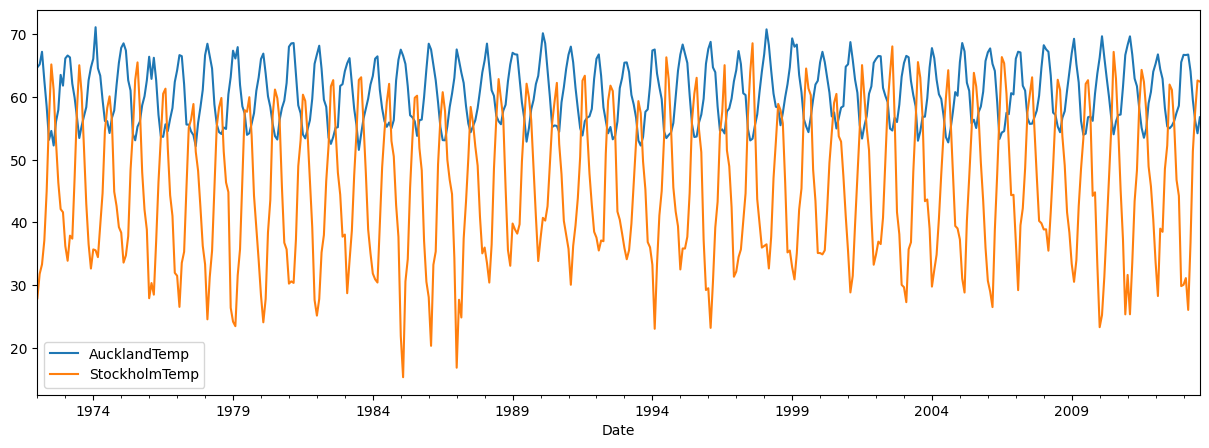

In [10]:
joined_part.plot(figsize=(15, 5));

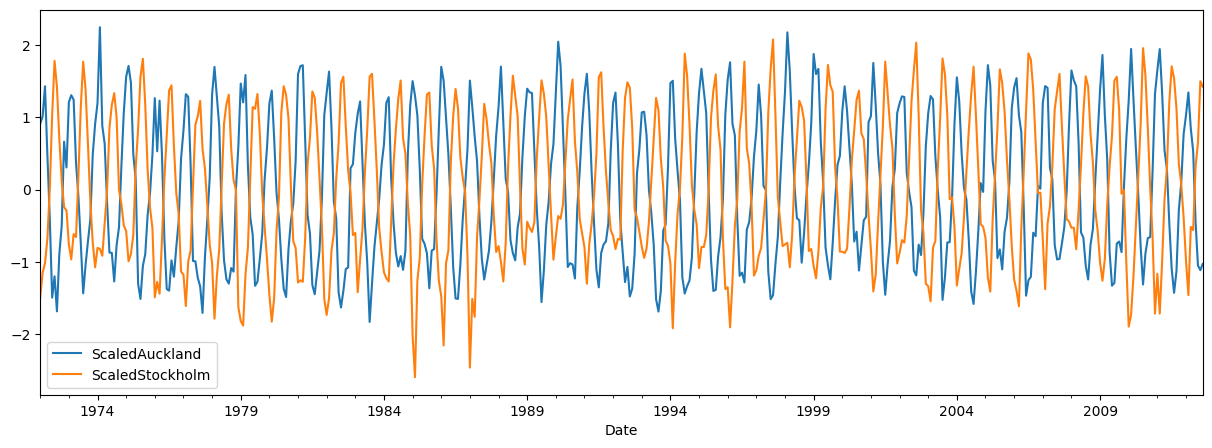

In [11]:
Ntest = 12
train = joined_part.iloc[:-Ntest].copy()
test = joined_part.iloc[-Ntest:].copy()

scaler_auckland = StandardScaler()

train['ScaledAuckland'] = scaler_auckland.fit_transform(train[['AucklandTemp']])
test['ScaledAuckland'] = scaler_auckland.transform(test[['AucklandTemp']])

scaler_stockholm = StandardScaler()
train['ScaledStockholm'] = scaler_stockholm.fit_transform(
    train[['StockholmTemp']])
test['ScaledStockholm'] = scaler_stockholm.transform(test[['StockholmTemp']])

train_idx = joined_part.index <= train.index[-1]
test_idx = joined_part.index > train.index[-1]

# put them back in original df
joined_part.loc[train_idx, 'ScaledAuckland'] = train['ScaledAuckland']
joined_part.loc[test_idx, 'ScaledAuckland'] = test['ScaledAuckland']
joined_part.loc[train_idx, 'ScaledStockholm'] = train['ScaledStockholm']
joined_part.loc[test_idx, 'ScaledStockholm'] = test['ScaledStockholm']
cols = ['ScaledAuckland', 'ScaledStockholm']
train[cols].plot(figsize=(15, 5));

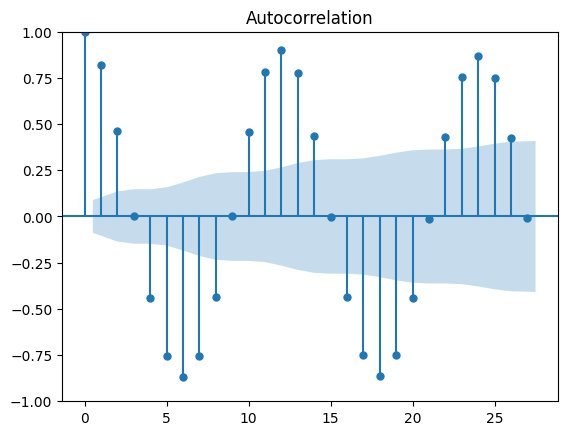

In [12]:
plot_acf(train['ScaledAuckland']);

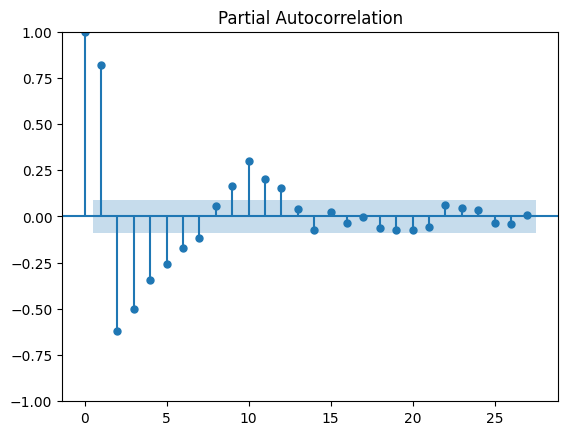

In [13]:
plot_pacf(train['ScaledAuckland']);

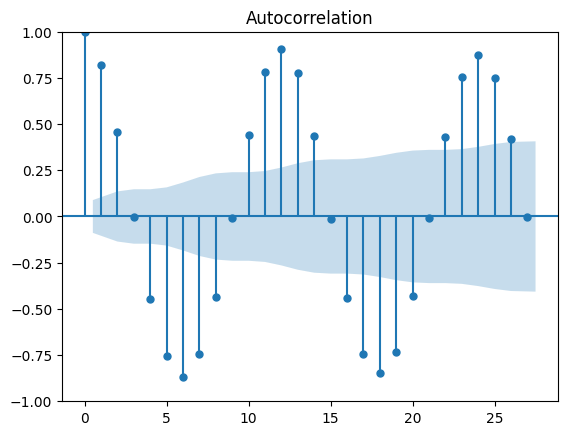

In [14]:
plot_acf(train['ScaledStockholm']);

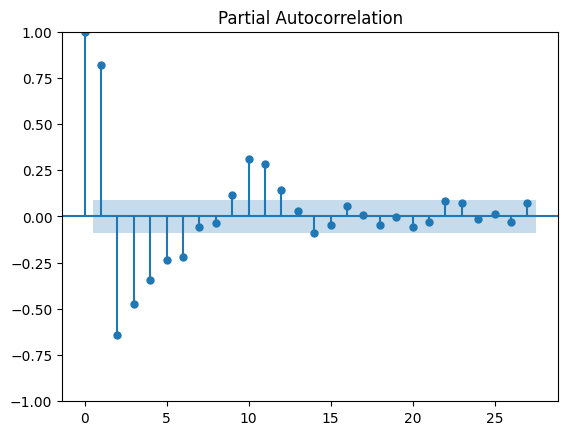

In [15]:
plot_pacf(train['ScaledStockholm']);

In [16]:
datetime.now()

datetime.datetime(2024, 6, 7, 5, 15, 54, 481738)

In [17]:
t0 = datetime.now()
model = VARMAX(train[cols], order=(10, 10))
res = model.fit(maxiter=100)
print("Duration:", datetime.now() - t0)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Duration: 0:07:40.073308


In [18]:
fcast = res.get_forecast(Ntest)

In [19]:
res.fittedvalues['ScaledAuckland']

Date
1972-01-01   -0.008915
1972-02-01    0.835911
1972-03-01    0.717825
1972-04-01    0.818590
1972-05-01   -0.082818
                ...   
2012-04-01    0.513167
2012-05-01   -0.293116
2012-06-01   -1.064043
2012-07-01   -1.329765
2012-08-01   -1.065518
Freq: MS, Name: ScaledAuckland, Length: 488, dtype: float64

In [20]:
joined_part.loc[train_idx, 'Train Pred Auckland'] = \
  res.fittedvalues['ScaledAuckland']
joined_part.loc[test_idx, 'Test Pred Auckland'] = \
  fcast.predicted_mean['ScaledAuckland']

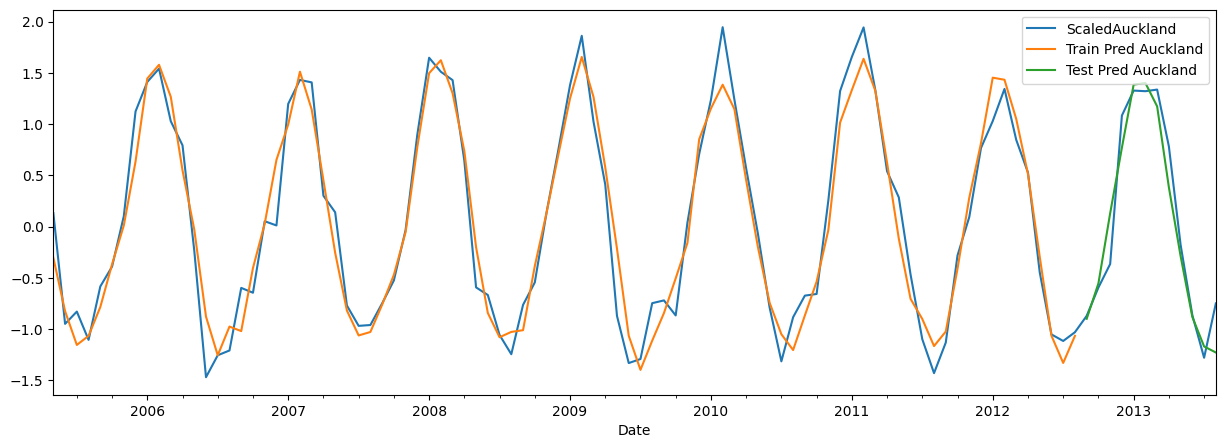

In [21]:
plot_cols = ['ScaledAuckland', 'Train Pred Auckland', 'Test Pred Auckland']
joined_part.iloc[-100:][plot_cols].plot(figsize=(15, 5));

In [22]:
joined_part.loc[train_idx, 'Train Pred Stockholm'] = \
  res.fittedvalues['ScaledStockholm']
joined_part.loc[test_idx, 'Test Pred Stockholm'] = \
  fcast.predicted_mean['ScaledStockholm']

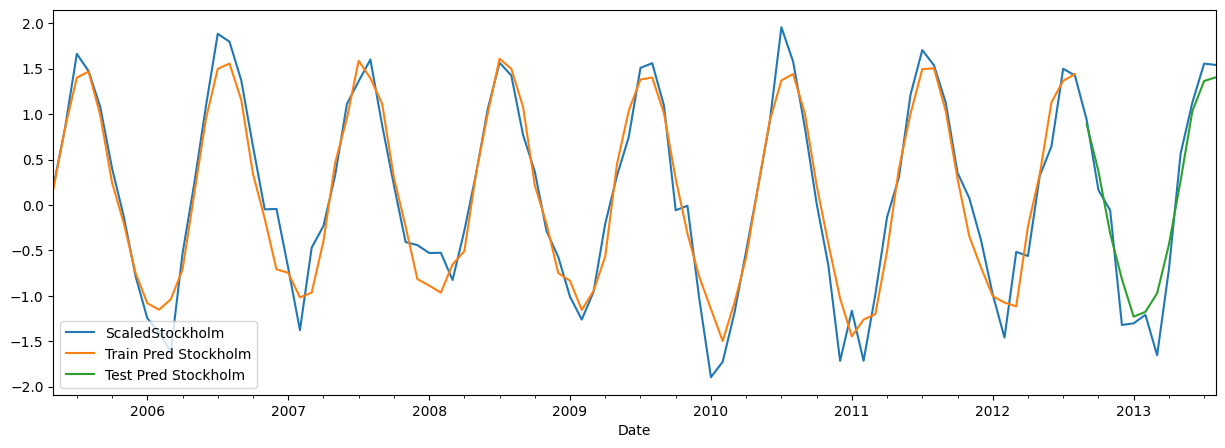

In [23]:
plot_cols = ['ScaledStockholm', 'Train Pred Stockholm', 'Test Pred Stockholm']
joined_part.iloc[-100:][plot_cols].plot(figsize=(15, 5));

In [24]:
from sklearn.metrics import mean_squared_error as mse

In [25]:
y_pred = joined_part.loc[train_idx, 'Train Pred Auckland']
y_true = joined_part.loc[train_idx, 'ScaledAuckland']
print("Auckland Train RMSE:", mse(y_true, y_pred))

y_pred = joined_part.loc[test_idx, 'Test Pred Auckland']
y_true = joined_part.loc[test_idx, 'ScaledAuckland']
print("Auckland Test RMSE:", mse(y_true, y_pred))

Auckland Train RMSE: 0.07049925687642489
Auckland Test RMSE: 0.06625851153286554


In [26]:
y_pred = joined_part.loc[train_idx, 'Train Pred Stockholm']
y_true = joined_part.loc[train_idx, 'ScaledStockholm']
print("Stockholm Train RMSE:", mse(y_true, y_pred))

y_pred = joined_part.loc[test_idx, 'Test Pred Stockholm']
y_true = joined_part.loc[test_idx, 'ScaledStockholm']
print("Stockholm Test RMSE:", mse(y_true, y_pred))

Stockholm Train RMSE: 0.07529792344946215
Stockholm Test RMSE: 0.08870030914238775


### VAR

In [27]:
model = VAR(train[cols])

In [28]:
lag_order_results = model.select_order(maxlags=15)
lag_order_results

In [29]:
lag_order_results.selected_orders

{'aic': 12, 'bic': 6, 'hqic': 11, 'fpe': 12}

In [30]:
results = model.fit(maxlags=15, ic='aic')

In [31]:
lag_order = results.k_ar

In [32]:
prior = train.iloc[-lag_order:][cols].to_numpy() # why need this?
fcast = results.forecast(prior, Ntest)

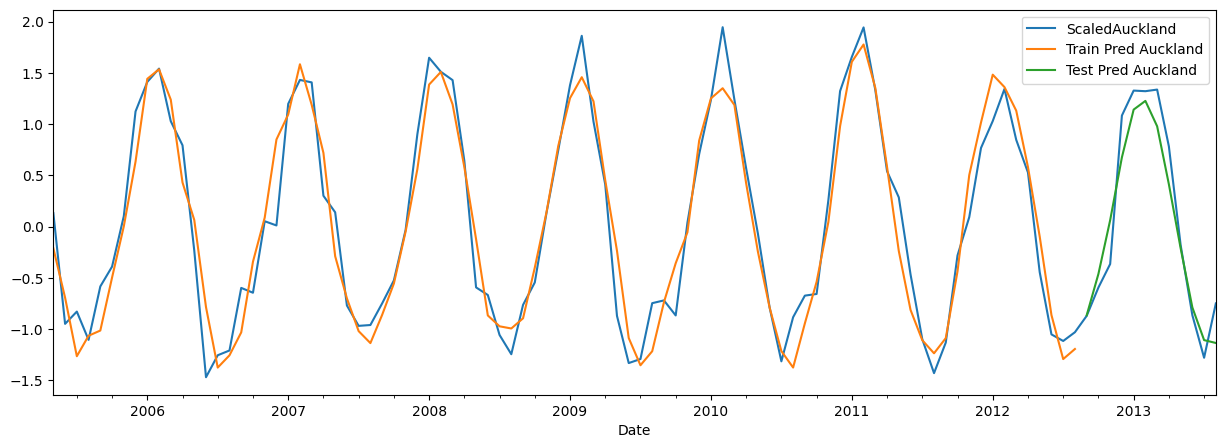

In [33]:
joined_part.loc[train_idx, 'Train Pred Auckland'] = \
  results.fittedvalues['ScaledAuckland']
joined_part.loc[test_idx, 'Test Pred Auckland'] = \
  fcast[:,0]

plot_cols = ['ScaledAuckland', 'Train Pred Auckland', 'Test Pred Auckland']
joined_part.iloc[-100:][plot_cols].plot(figsize=(15, 5));

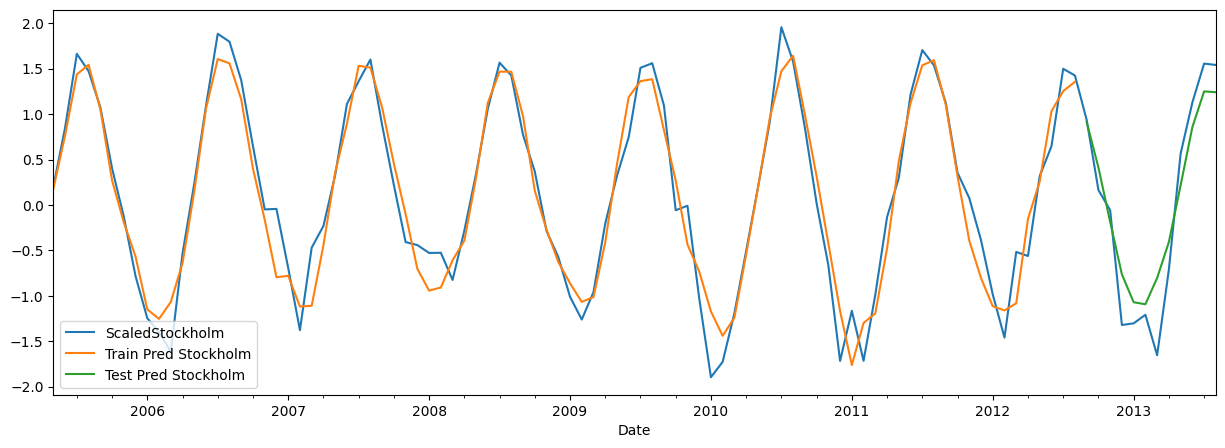

In [34]:
joined_part.loc[train_idx, 'Train Pred Stockholm'] = \
  results.fittedvalues['ScaledStockholm']
joined_part.loc[test_idx, 'Test Pred Stockholm'] = \
  fcast[:,1]

plot_cols = ['ScaledStockholm', 'Train Pred Stockholm', 'Test Pred Stockholm']
joined_part.iloc[-100:][plot_cols].plot(figsize=(15, 5));

In [35]:
y_pred = joined_part.loc[train_idx, 'Train Pred Auckland']
y_true = joined_part.loc[train_idx, 'ScaledAuckland']
y_true = y_true.iloc[lag_order:]
y_pred = y_pred.iloc[lag_order:]
print("Auckland Train RMSE:", mse(y_true, y_pred))

y_pred = joined_part.loc[test_idx, 'Test Pred Auckland']
y_true = joined_part.loc[test_idx, 'ScaledAuckland']
print("Auckland Test RMSE:", mse(y_true, y_pred))

Auckland Train RMSE: 0.07886453785510855
Auckland Test RMSE: 0.07171384181630808


In [36]:
y_pred = joined_part.loc[train_idx, 'Train Pred Stockholm']
y_true = joined_part.loc[train_idx, 'ScaledStockholm']
y_true = y_true.iloc[lag_order:]
y_pred = y_pred.iloc[lag_order:]
print("Stockholm Train RMSE:", mse(y_true, y_pred))

y_pred = joined_part.loc[test_idx, 'Test Pred Stockholm']
y_true = joined_part.loc[test_idx, 'ScaledStockholm']
print("Stockholm Test RMSE:", mse(y_true, y_pred))

Stockholm Train RMSE: 0.07330382753095288
Stockholm Test RMSE: 0.13760093830356254


In [37]:
## Implementing ARIMA on this data
from statsmodels.tsa.arima.model import ARIMA

for col in cols:
  model = ARIMA(train[col], order=(10, 0, 10))
  res = model.fit()
  fcast = res.get_forecast(Ntest)
  print(f"{col} Train RMSE:", mse(joined_part.loc[train_idx, col], res.fittedvalues))
  print(f"{col} Test RMSE:", mse(joined_part.loc[test_idx, col], fcast.predicted_mean))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ScaledAuckland Train RMSE: 0.0786238278496166
ScaledAuckland Test RMSE: 0.05795185968128522
ScaledStockholm Train RMSE: 0.0792812466507336
ScaledStockholm Test RMSE: 0.06663707338667248


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Neural Networks


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (8, 6)

# deep imports
import tensorflow as tf

# the evaluation
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from tensorflow.keras.layers import Dense, Input  # to create layer
from tensorflow.keras.models import Model  # whole model

Damn, this time apart from metrics, there is no `sklearn` import at all!

In [39]:
# we can put the seeds for tensorflow this way
tf.random.set_seed(42)

In [40]:
passengers = pd.read_csv(
    "/content/airline_passengers.csv", parse_dates=True, index_col=0
)

In [41]:
passengers.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

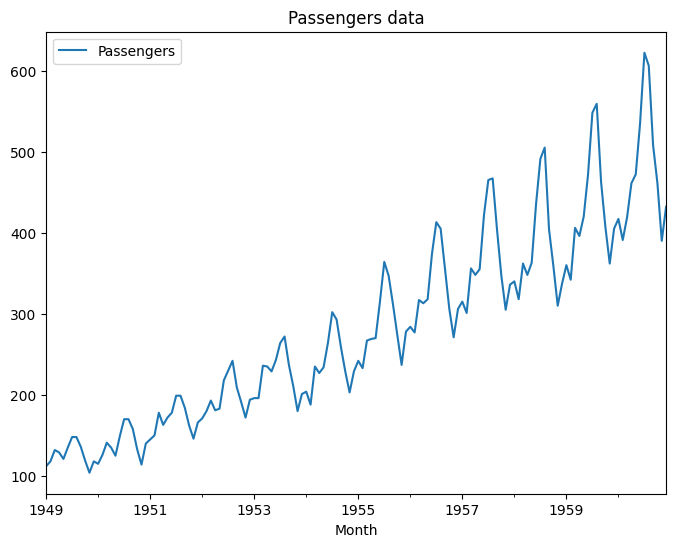

In [42]:
passengers.plot()
plt.title("Passengers data");

Let's start creating the models.

The outline of this notebook:
1. Create a **one-step** model
2. Create a **multi-step** / incremental model
3. Create a **multi-output** / MTR model

In [43]:
# Applying Differencing
passengers["diffPassengers"] = passengers["Passengers"].diff()

In [44]:
passengers.head()

Passengers  diffPassengers
Month                                 
1949-01-01         112             NaN
1949-02-01         118             6.0
1949-03-01         132            14.0
1949-04-01         129            -3.0
1949-05-01         121            -8.0

## `1.` One step model

In [45]:
lag = 12
train_idx = passengers.iloc[:-lag].index
test_idx = passengers.iloc[-lag:].index

In [46]:
np_data = passengers.loc[:, "diffPassengers"].dropna().values
X = []
Y = []

for i in range(0, np_data.shape[0] - lag):
    x = np_data[i : i + lag]
    y = np_data[i + lag]
    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

In [47]:
Xtr, Xte = X[:-lag], X[-lag:]
ytr, yte = Y[:-lag], Y[-lag:]

In [48]:
## Model creation
# set the input layer
input_layer = Input(shape=(Xtr.shape[1],))

There, we have initialized the input with `12` nodes. Which are the number of columns. They are coming based on the `lag` variable that we have set there.

In [49]:
input_layer

<KerasTensor: shape=(None, 12) dtype=float32 (created by layer 'input_1')>

Now, we will go ahead and add the first *hidden layer* in the NN.

In [50]:
# first hidden layer
h1 = Dense(units=7, activation="relu")

In [51]:
# connection in single step
h1 = Dense(7, activation="relu")(input_layer)

In [52]:
# Output layer
output_layer = Dense(1, activation=None)(h1)

That simple! Just **take care** of the **conections**. That what you are connecting with what.

In [53]:
# Everything in a single pack = Model
model = Model(input_layer, output_layer)

In [54]:
# everything in a single cell
input_layer = Input(shape=(Xtr.shape[1],))
h1 = Dense(7, activation="relu")(input_layer)
output_layer = Dense(1, activation=None)(h1)
model = Model(input_layer, output_layer)

Our neural net is ready bois!

In [55]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_3 (Dense)             (None, 7)                 91        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 99 (396.00 Byte)
Trainable params: 99 (396.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
##Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mse", "mape"])

In [58]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [59]:
result = model.fit(Xtr, ytr,
         epochs=100,
         validation_data=(Xte, yte), verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 103ms/step - loss: 1702.0244 - mse: 1702.0244 - mape: 336499488.0000 - val_loss: 4003.5381 - val_mse: 4003.5381 - val_mape: 113.0029
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 1647.9501 - mse: 1647.9501 - mape: 334073216.0000 - val_loss: 3869.8923 - val_mse: 3869.8923 - val_mape: 111.0186
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 1598.0382 - mse: 1598.0382 - mape: 332586112.0000 - val_loss: 3739.1921 - val_mse: 3739.1921 - val_mape: 108.9043
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 1546.7740 - mse: 1546.7739 - mape: 331764416.0000 - val_loss: 3616.4758 - val_mse: 3616.4758 - val_mape: 106.9352
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 1503.9425 - mse: 1503.9425 - mape: 330074368.0000 - val_loss: 3496.3594 - val_mse: 3496.3594 - val_mape: 104.9688
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - los

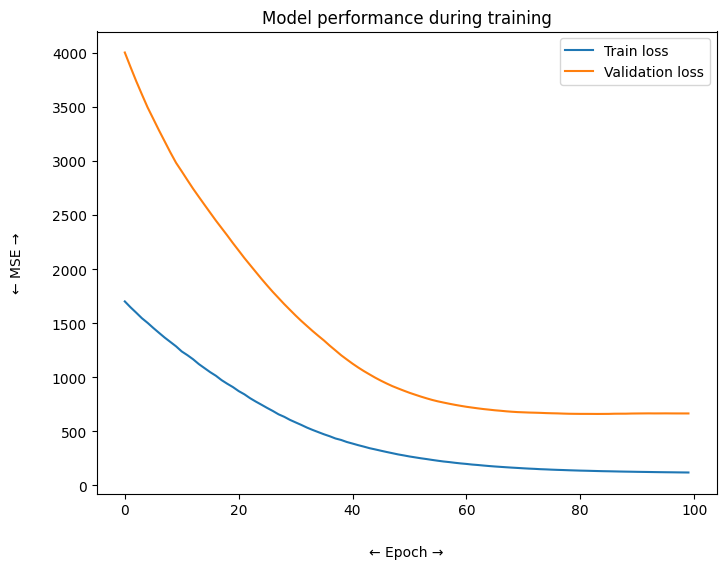

In [60]:
## See the loss for validation and training...
plt.plot(result.history['loss'], label="Train loss")
plt.plot(result.history['val_loss'], label="Validation loss")
plt.xlabel("← Epoch →", labelpad=20)
plt.ylabel("← MSE →", labelpad=20)
plt.title("Model performance during training")
plt.legend();

In [61]:
## Predict and plot the results
pred_tr = model.predict(Xtr).flatten()
pred_te = model.predict(Xte).flatten()

1/1 [==============================] - 0s 31ms/step


In [62]:
passengers.loc[train_idx[lag+1:], "OneStep Diff Train Prediction"] = pred_tr
passengers.loc[test_idx, "OneStep Diff Test Prediction"] = pred_te

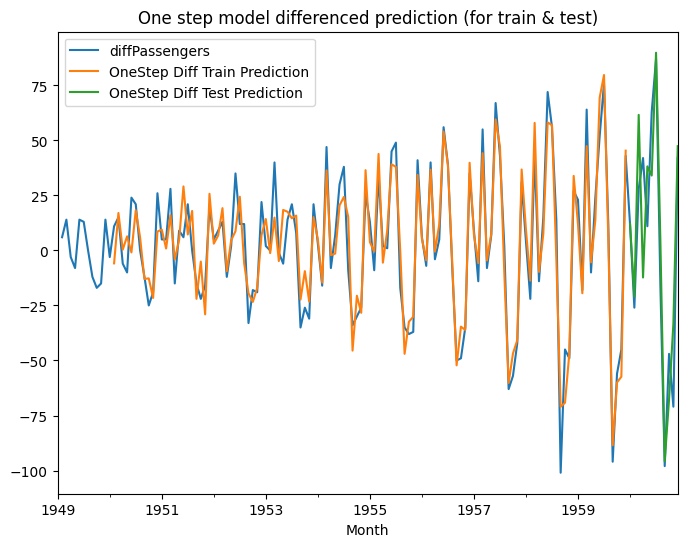

In [63]:
passengers[["diffPassengers",
            "OneStep Diff Train Prediction",
            "OneStep Diff Test Prediction"]].plot()
plt.title("One step model differenced prediction (for train & test)");

In [64]:
mse(ytr, pred_tr)

119.67952674278605

For one-step: *just add the previous **true** step to the prediction.*

In [65]:
prev = passengers["Passengers"].shift(1)

In [66]:
passengers.loc[train_idx[lag+1:], "OneStep Orig Train Pred"] = prev[train_idx[lag+1:]] + pred_tr
passengers.loc[test_idx, "OneStep Orig Test Pred"] = prev[test_idx] + pred_te

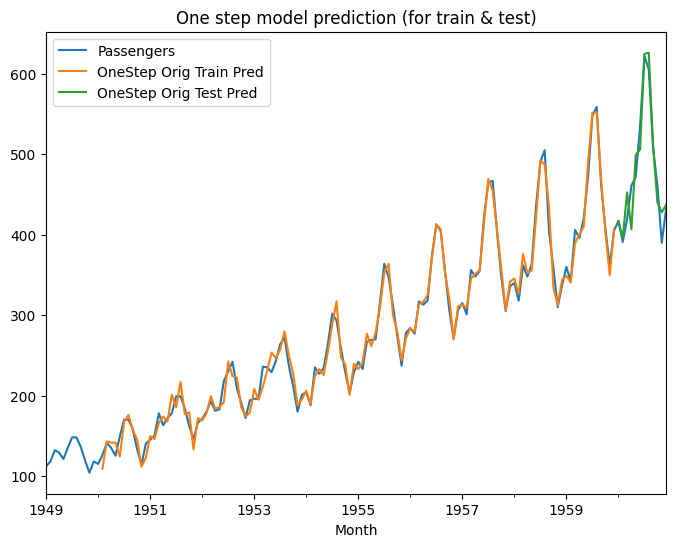

In [67]:
passengers[["Passengers", "OneStep Orig Train Pred", "OneStep Orig Test Pred"]].plot()
plt.title("One step model prediction (for train & test)");

In [68]:
mse(passengers.loc[test_idx, "Passengers"], passengers.loc[test_idx, "OneStep Orig Test Pred"])

666.1639451254251

## `2.` Multi step model

Since the model is **already trained** we don't need to train it once again. We will just **change the way we forecast**.

In [69]:
## Predict and plot the results
last_xte = Xte[0].reshape(1, -1)
multi_step_pred = []
for i in range(yte.shape[0]):
    pred = model.predict(last_xte)[0]
    last_xte = np.roll(last_xte, -1)
    last_xte[-1][-1] = pred

    multi_step_pred.append(pred)

1/1 [==============================] - 0s 35ms/step


<ipython-input-69-9e73b238ab98>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_xte[-1][-1] = pred


1/1 [==============================] - 0s 38ms/step


In [70]:
passengers.loc[test_idx, "MultiStep Test Prediction"] = multi_step_pred

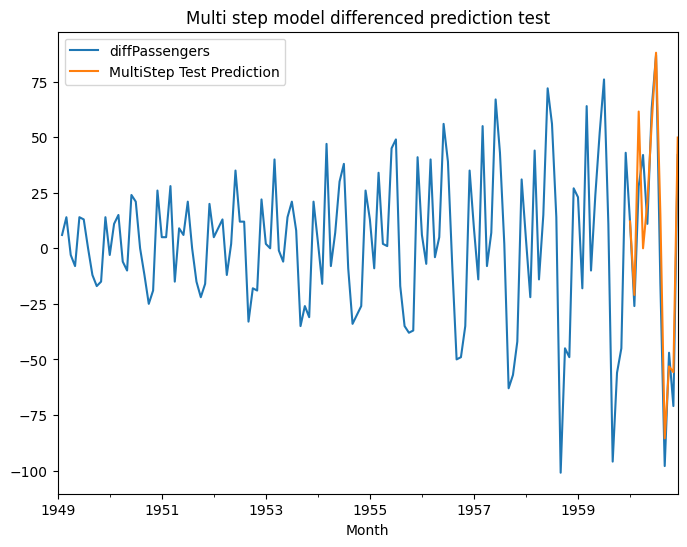

In [71]:
passengers[["diffPassengers", "MultiStep Test Prediction"]].plot()
plt.title("Multi step model differenced prediction test");

For multi-step: *just add the previous **true** step and perform cumsum.*

In [72]:
last_train = passengers.loc[train_idx[-1], "Passengers"]

In [73]:
passengers.loc[test_idx, "MultiStep Orig Test Pred"] = last_train + np.cumsum(multi_step_pred)

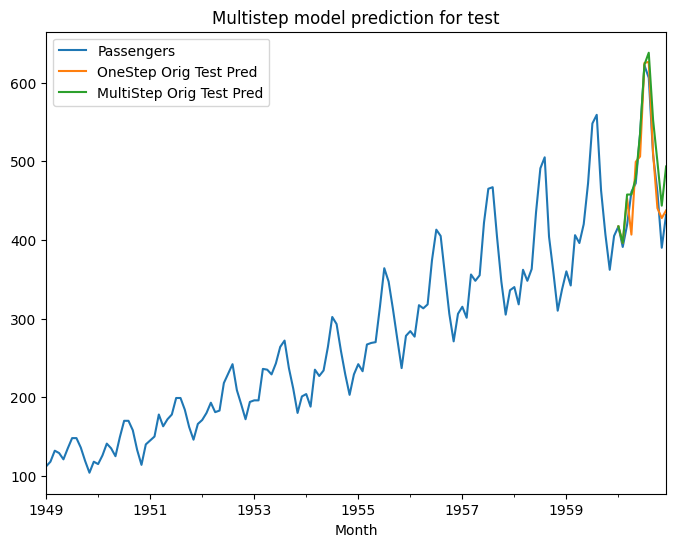

In [74]:
passengers[["Passengers", "OneStep Orig Test Pred", "MultiStep Orig Test Pred"]].plot()
plt.title("Multistep model prediction for test");

In [75]:
mse(passengers.loc[test_idx, "Passengers"], passengers.loc[test_idx, "MultiStep Orig Test Pred"])

1055.5124177642476

## `3.` Multi output model

Here, we will need to create different training and testing data... and will need to re-train the model from scratch. Not only that, the model's **structure** will change as well.

In [76]:
# for this we will have to construct another dataset
# the current supervised dataset won't help.

lag = 12
h = 12
X, y = [], []
for offset in range(len(np_data) - lag - h + 1):
    X.append(np_data[offset : offset+lag])
    y.append(np_data[offset+lag : offset+lag+h])

X = np.array(X)
y = np.array(y)

In [77]:
Xtr_m, ytr_m = X[:-1], y[:-1]
Xte_m, yte_m = X[[-1]], y[[-1]]

In [78]:
Xtr_m.shape

(119, 12)

In [79]:
ytr_m.shape

(119, 12)

In [80]:
## Model creation
input_layer = Input(shape=(Xtr_m.shape[1], ))
h1 = Dense(7, activation="relu")(input_layer)
output_layer = Dense(ytr_m.shape[1])(h1)
model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_7 (Dense)             (None, 32)                416       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 12)                396       
                                                                 
Total params: 1868 (7.30 KB)
Trainable params: 1868 (7.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# compile
model.compile(optimizer="adam", loss="mse")

In [82]:
# fit
mtr_result = model.fit(Xtr_m, ytr_m,
                       epochs=100,
                       validation_data=(Xte_m, yte_m))

Epoch 1/100
4/4 [==============================] - 1s 57ms/step - loss: 1543.5546 - val_loss: 3816.6162
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 1518.7119 - val_loss: 3742.8057
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 1494.1632 - val_loss: 3681.8215
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 1472.9558 - val_loss: 3617.0281
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 1450.2325 - val_loss: 3552.6582
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 1429.0188 - val_loss: 3492.6357
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 1410.0952 - val_loss: 3438.3162
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 1390.1558 - val_loss: 3390.7715
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 1373.3988 - val_loss: 3345.2703
Epoch 10/100
4/4 [==============================] - 0s 11ms/step

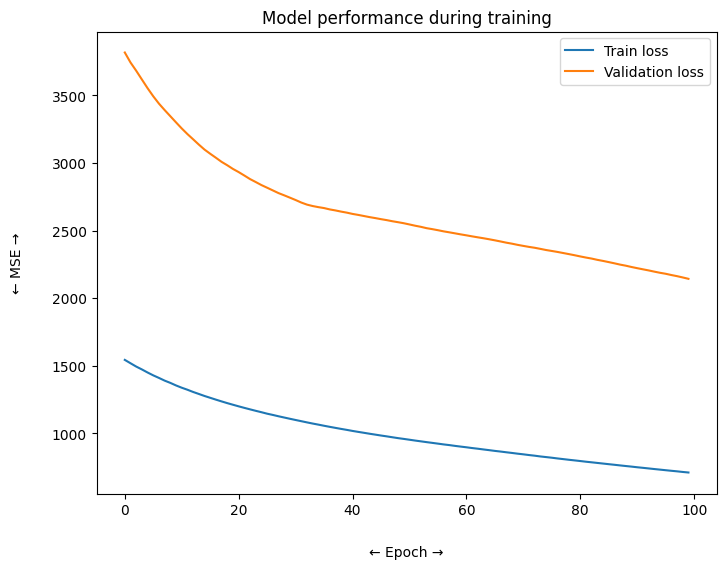

In [83]:
plt.plot(mtr_result.history['loss'], label="Train loss")
plt.plot(mtr_result.history['val_loss'], label="Validation loss")
plt.xlabel("← Epoch →", labelpad=20)
plt.ylabel("← MSE →", labelpad=20)
plt.title("Model performance during training")
plt.legend();

In [84]:
mtr_test_pred = model.predict(Xte_m)

1/1 [==============================] - 0s 48ms/step


In [86]:
passengers.loc[test_idx, "MultiOutput Orig Test Pred"] = last_train + np.cumsum(mtr_test_pred)

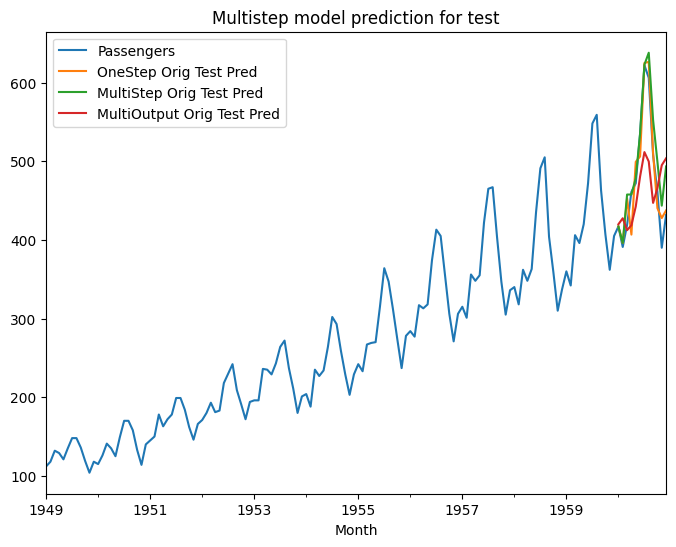

In [87]:
passengers[["Passengers", "OneStep Orig Test Pred", "MultiStep Orig Test Pred", "MultiOutput Orig Test Pred"]].plot()
plt.title("Multistep model prediction for test");

In [88]:
mse(passengers.loc[test_idx, "Passengers"], passengers.loc[test_idx, "MultiOutput Orig Test Pred"])

4200.864044856125